In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the data

In [ ]:
df = pd.read_csv("Data.csv")

## Renaming the columns

In [ ]:
column_dict = {'CUSR0000SETB01': 'Avg. Monthly Price',
               'DATE' : 'date'}

# Rename the columns
df = df.rename(columns = column_dict)
df.tail(10)

,date,Avg. Monthly Price
676,2023-05-01,300.042
677,2023-06-01,302.412
678,2023-07-01,301.784
679,2023-08-01,326.825
680,2023-09-01,332.019
681,2023-10-01,317.678
682,2023-11-01,304.982
683,2023-12-01,303.242
684,2024-01-01,293.287
685,2024-02-01,304.302


## Summary of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                686 non-null    object 
 1   Avg. Monthly Price  686 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [ ]:
summary = df.describe()
summary

,Avg. Monthly Price
count,686.000000
mean,138.563461
std,90.475329
min,26.100000
25%,80.400000
50%,102.000000
75%,211.300000
max,411.984000


## Trend of Price over time

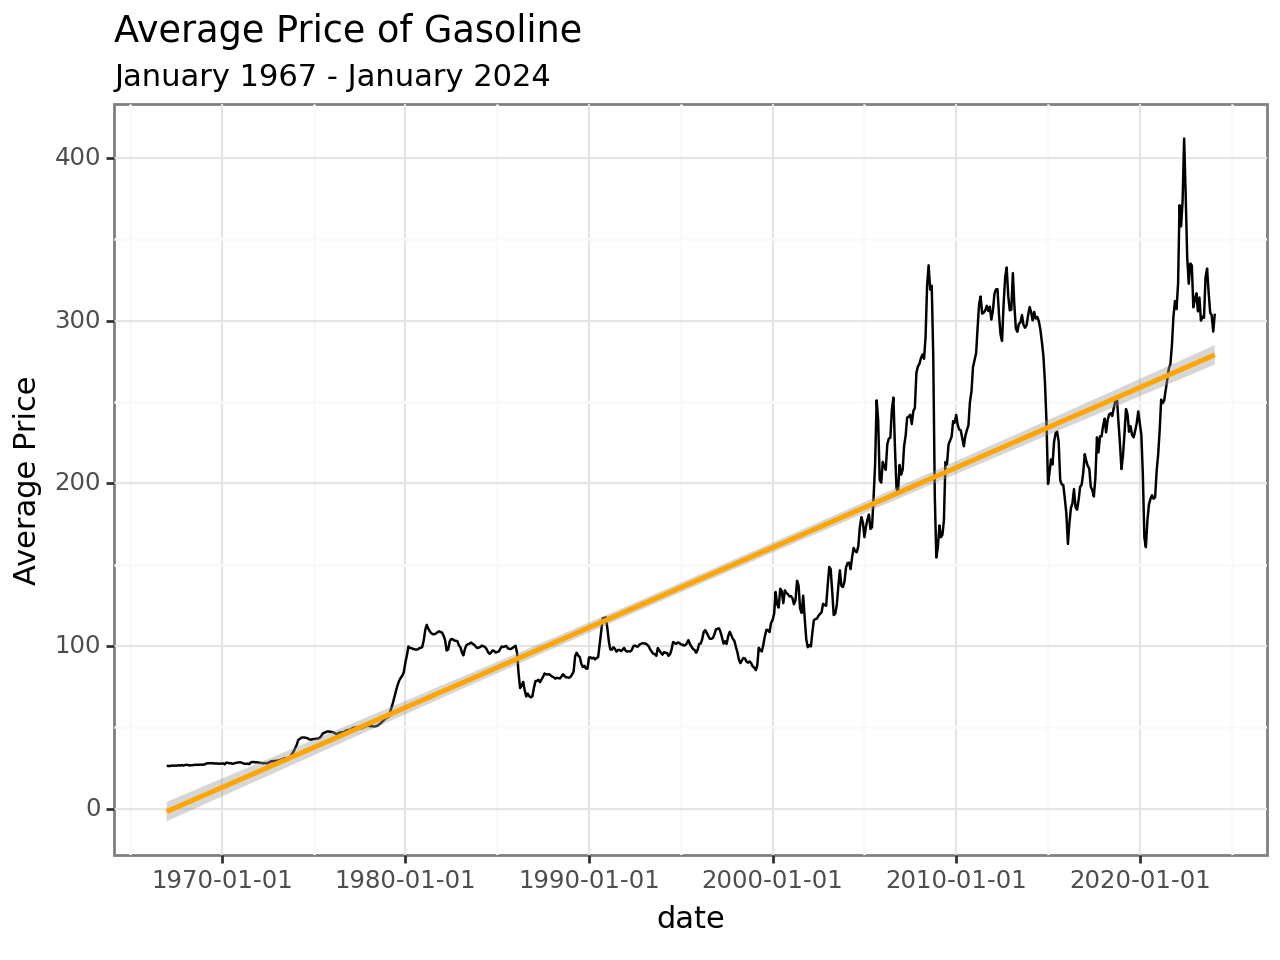

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_smooth, theme_bw, labs

# Convert 'Date' column to datetime type
df['date'] = pd.to_datetime(df['date'])




monthly_price_plot = (
    ggplot(df) +
    geom_line(aes(x='date', y='Avg. Monthly Price')) +
    theme_bw() +
    labs(x="date", y="Average Price", title='Average Price of Gasoline',
         subtitle='January 1967 - January 2024')
)

monthly_price_plot + geom_smooth(aes(x='date', y='Avg. Monthly Price'), method='lm', color='orange')


we see the following :
1. Dip around 2008 - could be because of the great depression period
2. again dips around 2015-16 due to the crude oil prices decreased
3.2022 -23 : russia - ukraine

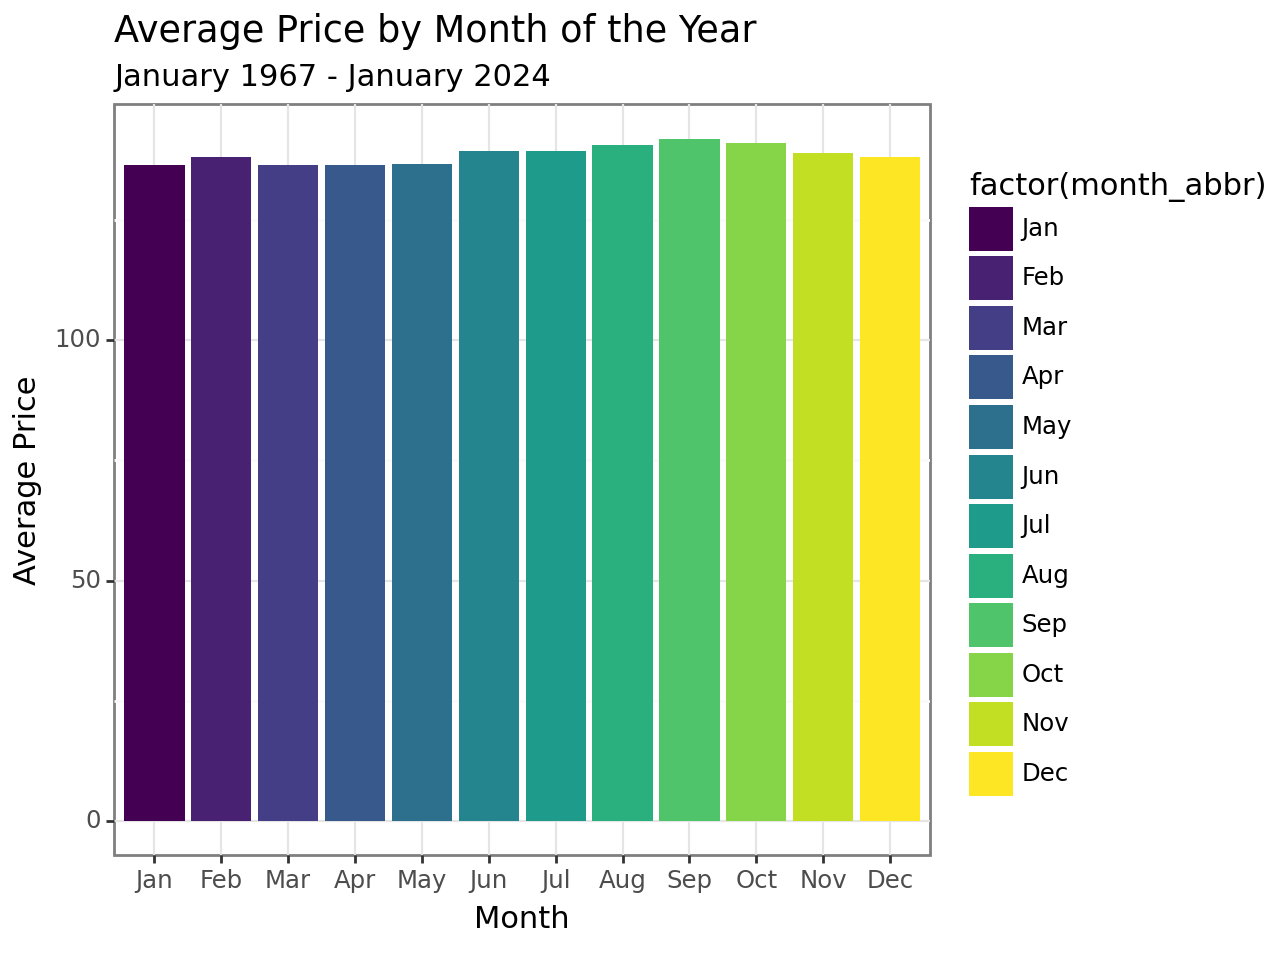

In [ ]:
import calendar
from plotnine import ggplot, aes, geom_col, theme_bw, labs
from pandas.api.types import CategoricalDtype

# Convert 'Date' to month
df['month'] = df['date'].dt.month

# Map month numbers to month abbreviations
df['month_abbr'] = df['month'].apply(lambda x: calendar.month_abbr[x])

# Specify the order of months
month_order = [calendar.month_abbr[i] for i in range(1, 13)]

# Convert 'month_abbr' to categorical data type with specified order
df['month_abbr'] = pd.Categorical(df['month_abbr'], categories=month_order, ordered=True)

# Group by month and calculate the mean of 'Avg Monthly Price'
monthdata = df.groupby('month_abbr')['Avg. Monthly Price'].mean().reset_index()


avg_month_price_plot = (
    ggplot(monthdata) +
    geom_col(aes(x='month_abbr', y='Avg. Monthly Price', fill='factor(month_abbr)')) +
    theme_bw() +
    labs(x="Month", y="Average Price",
         title='Average Price by Month of the Year',
         subtitle='January 1967 - January 2024')
)

print(avg_month_price_plot)

Observation : the prices seem to rise in the third quarter(Aug-Oct)-- the reason maybe the "Summer Driving Season" as they call it in the US . Mostly people go for vacations during this time . Need to think on more reasons

## Histogram of Average Price

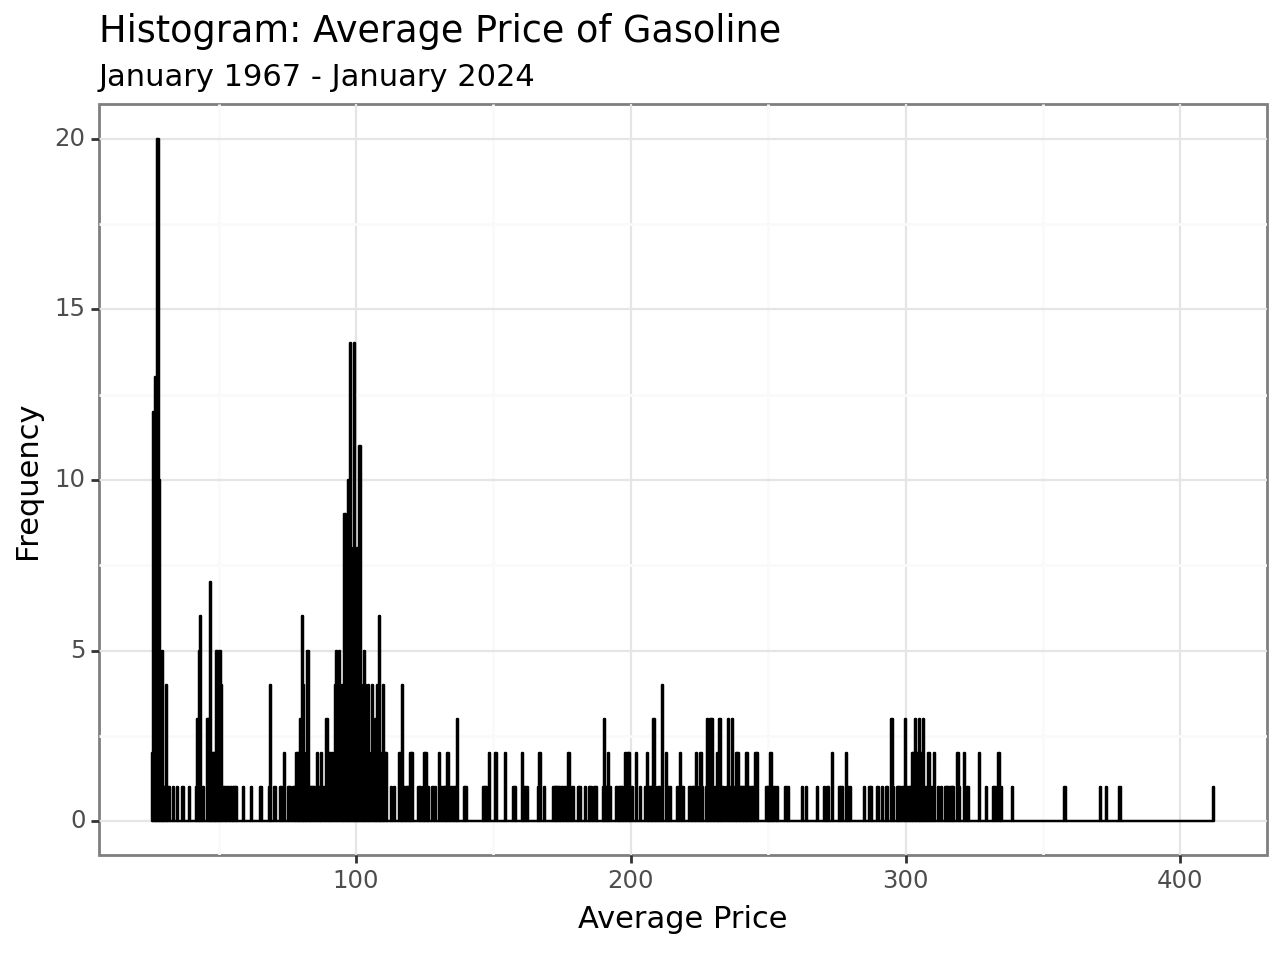

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_histogram, theme_bw, labs



p = (
    ggplot(df, aes(x='Avg. Monthly Price')) +
    geom_histogram(binwidth=0.5, fill="#336699", color="#000000", alpha=0.9) +
    labs(
        title='Histogram: Average Price of Gasoline',
        subtitle='January 1967 - January 2024',
        x="Average Price",
        y="Frequency"
    ) +
    theme_bw()
)

p

## Boxplot of Avg. Price

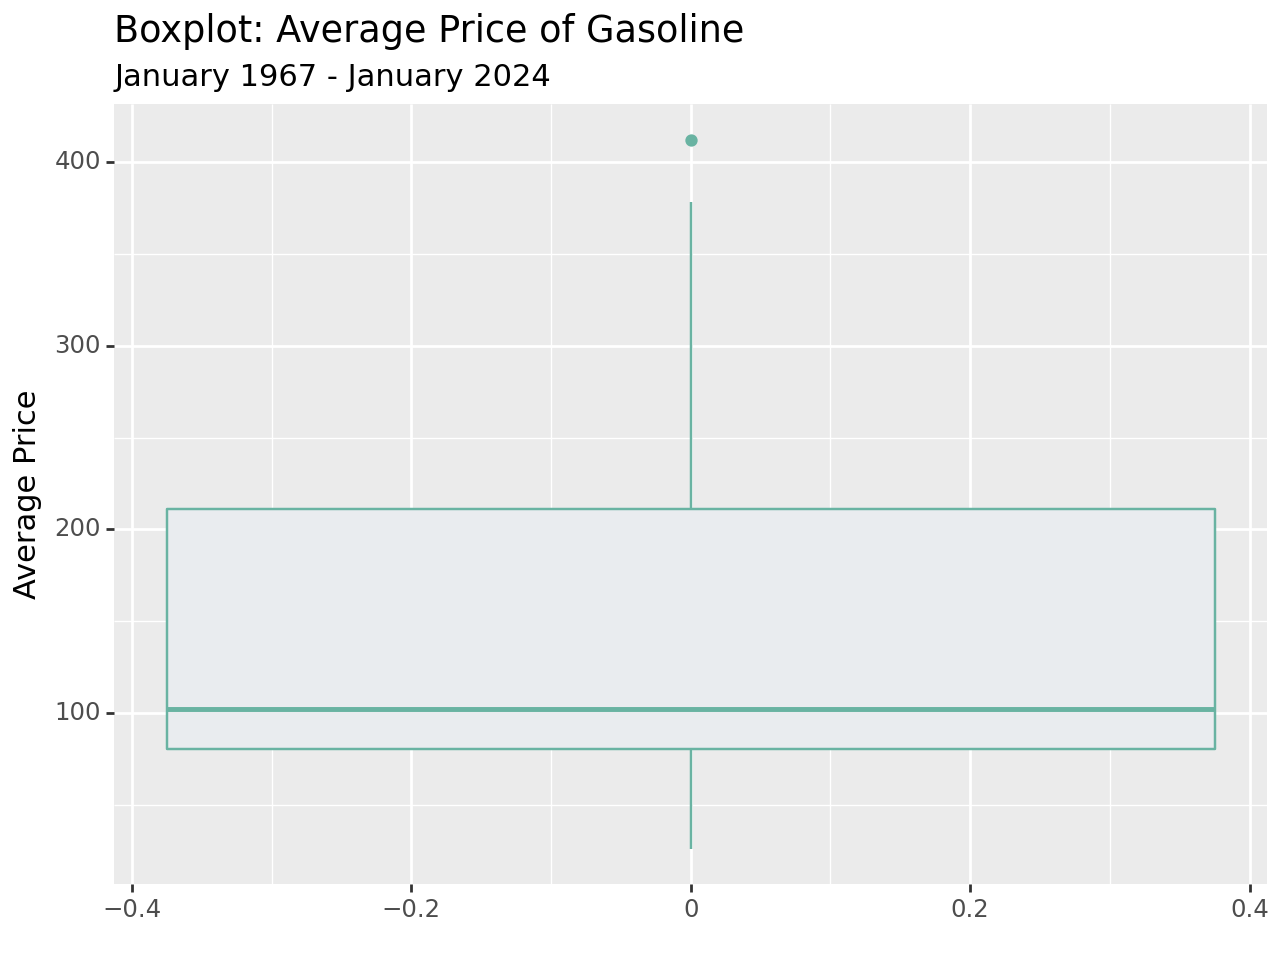

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot, labs

# Assuming 'fueldata' is your DataFrame with a column 'avg_price'
# Replace 'fueldata' with the actual name of your DataFrame if it's different
# Replace 'avg_price' with the actual column name if it's different

p_boxplot = (
    ggplot(df, aes(y='Avg. Monthly Price')) +
    geom_boxplot(fill='#e9ecef', color="#69b3a2") +
    labs(
        title='Boxplot: Average Price of Gasoline',
        subtitle='January 1967 - January 2024',
        y="Average Price"
    )
)
p_boxplot

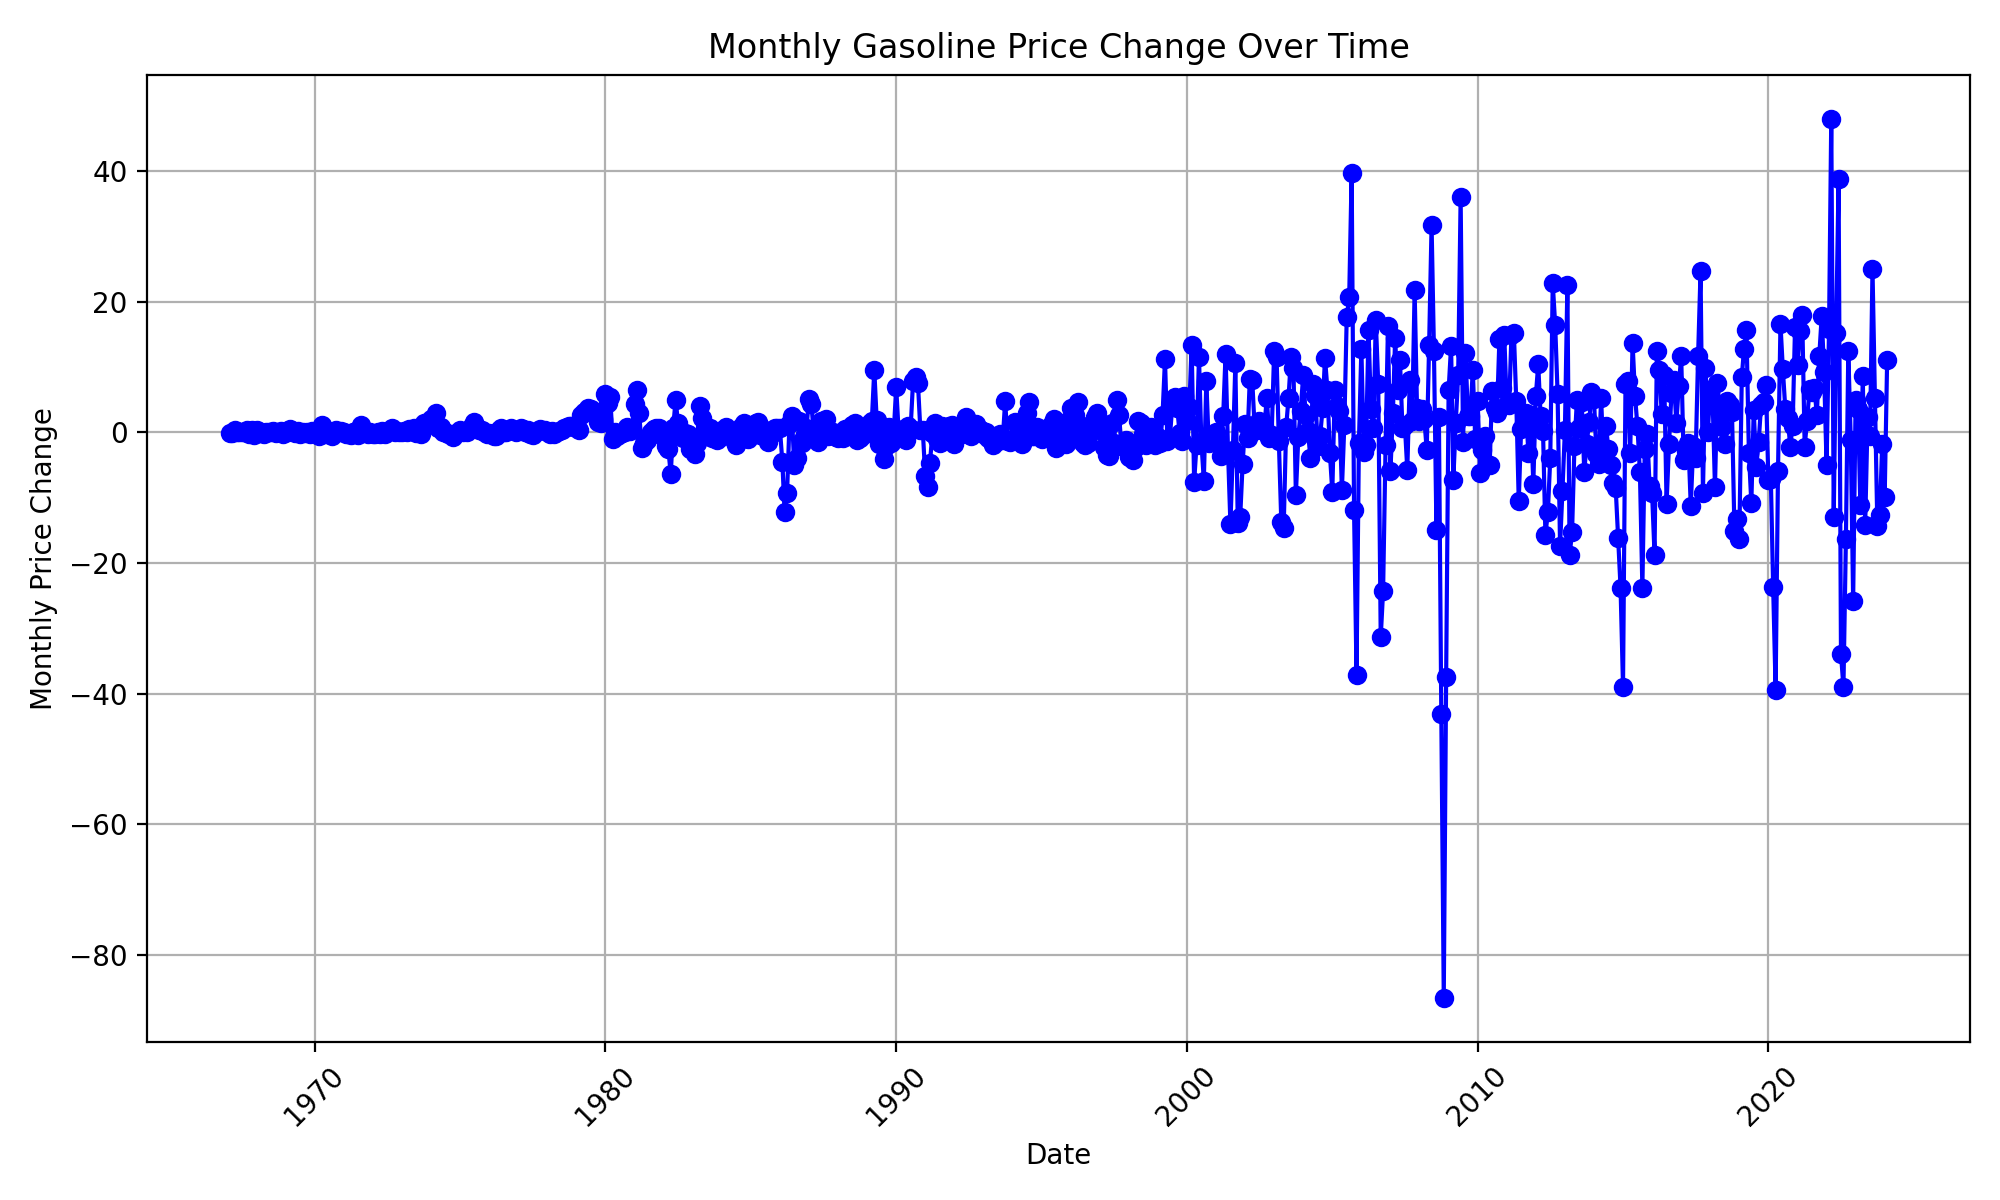

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the date and Avg. Monthly Price columns
# Make sure 'date' column is in datetime format

# Create a new column for monthly price change
df['Monthly Price Change'] = df['Avg. Monthly Price'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Monthly Price Change'], color='blue', marker='o', linestyle='-')
plt.title('Monthly Gasoline Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Price Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Stationary Check

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
adf_test(df['Avg. Monthly Price'])
kpss_test(df['Avg. Monthly Price'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.942385
p-value                          0.773694
#Lags Used                      15.000000
Number of Observations Used    670.000000
Critical Value (1%)             -3.440148
Critical Value (5%)             -2.865863
Critical Value (10%)            -2.569072
dtype: float64
Results of KPSS Test:
Test Statistic            3.32825
p-value                   0.01000
#Lags Used               17.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


<ipython-input-11-3744fc511bfb>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



In [ ]:
# Check for missing values, infinite values, or NaNs in 'Monthly Price Change'
print("Number of missing values:", df['Monthly Price Change'].isnull().sum())
print("Number of infinite values:", np.isinf(df['Monthly Price Change']).sum())
print("Number of NaNs:", np.isnan(df['Monthly Price Change']).sum())

Number of missing values: 1
Number of infinite values: 0
Number of NaNs: 1


In [ ]:
df.dropna(subset=['Monthly Price Change'], inplace=True)

In [ ]:
adf_test(df['Monthly Price Change'])
kpss_test(df['Monthly Price Change'])

Results of Dickey-Fuller Test:
Test Statistic                -6.768281e+00
p-value                        2.682158e-09
#Lags Used                     1.400000e+01
Number of Observations Used    6.700000e+02
Critical Value (1%)           -3.440148e+00
Critical Value (5%)           -2.865863e+00
Critical Value (10%)          -2.569072e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.032702
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-11-3744fc511bfb>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



## ACF

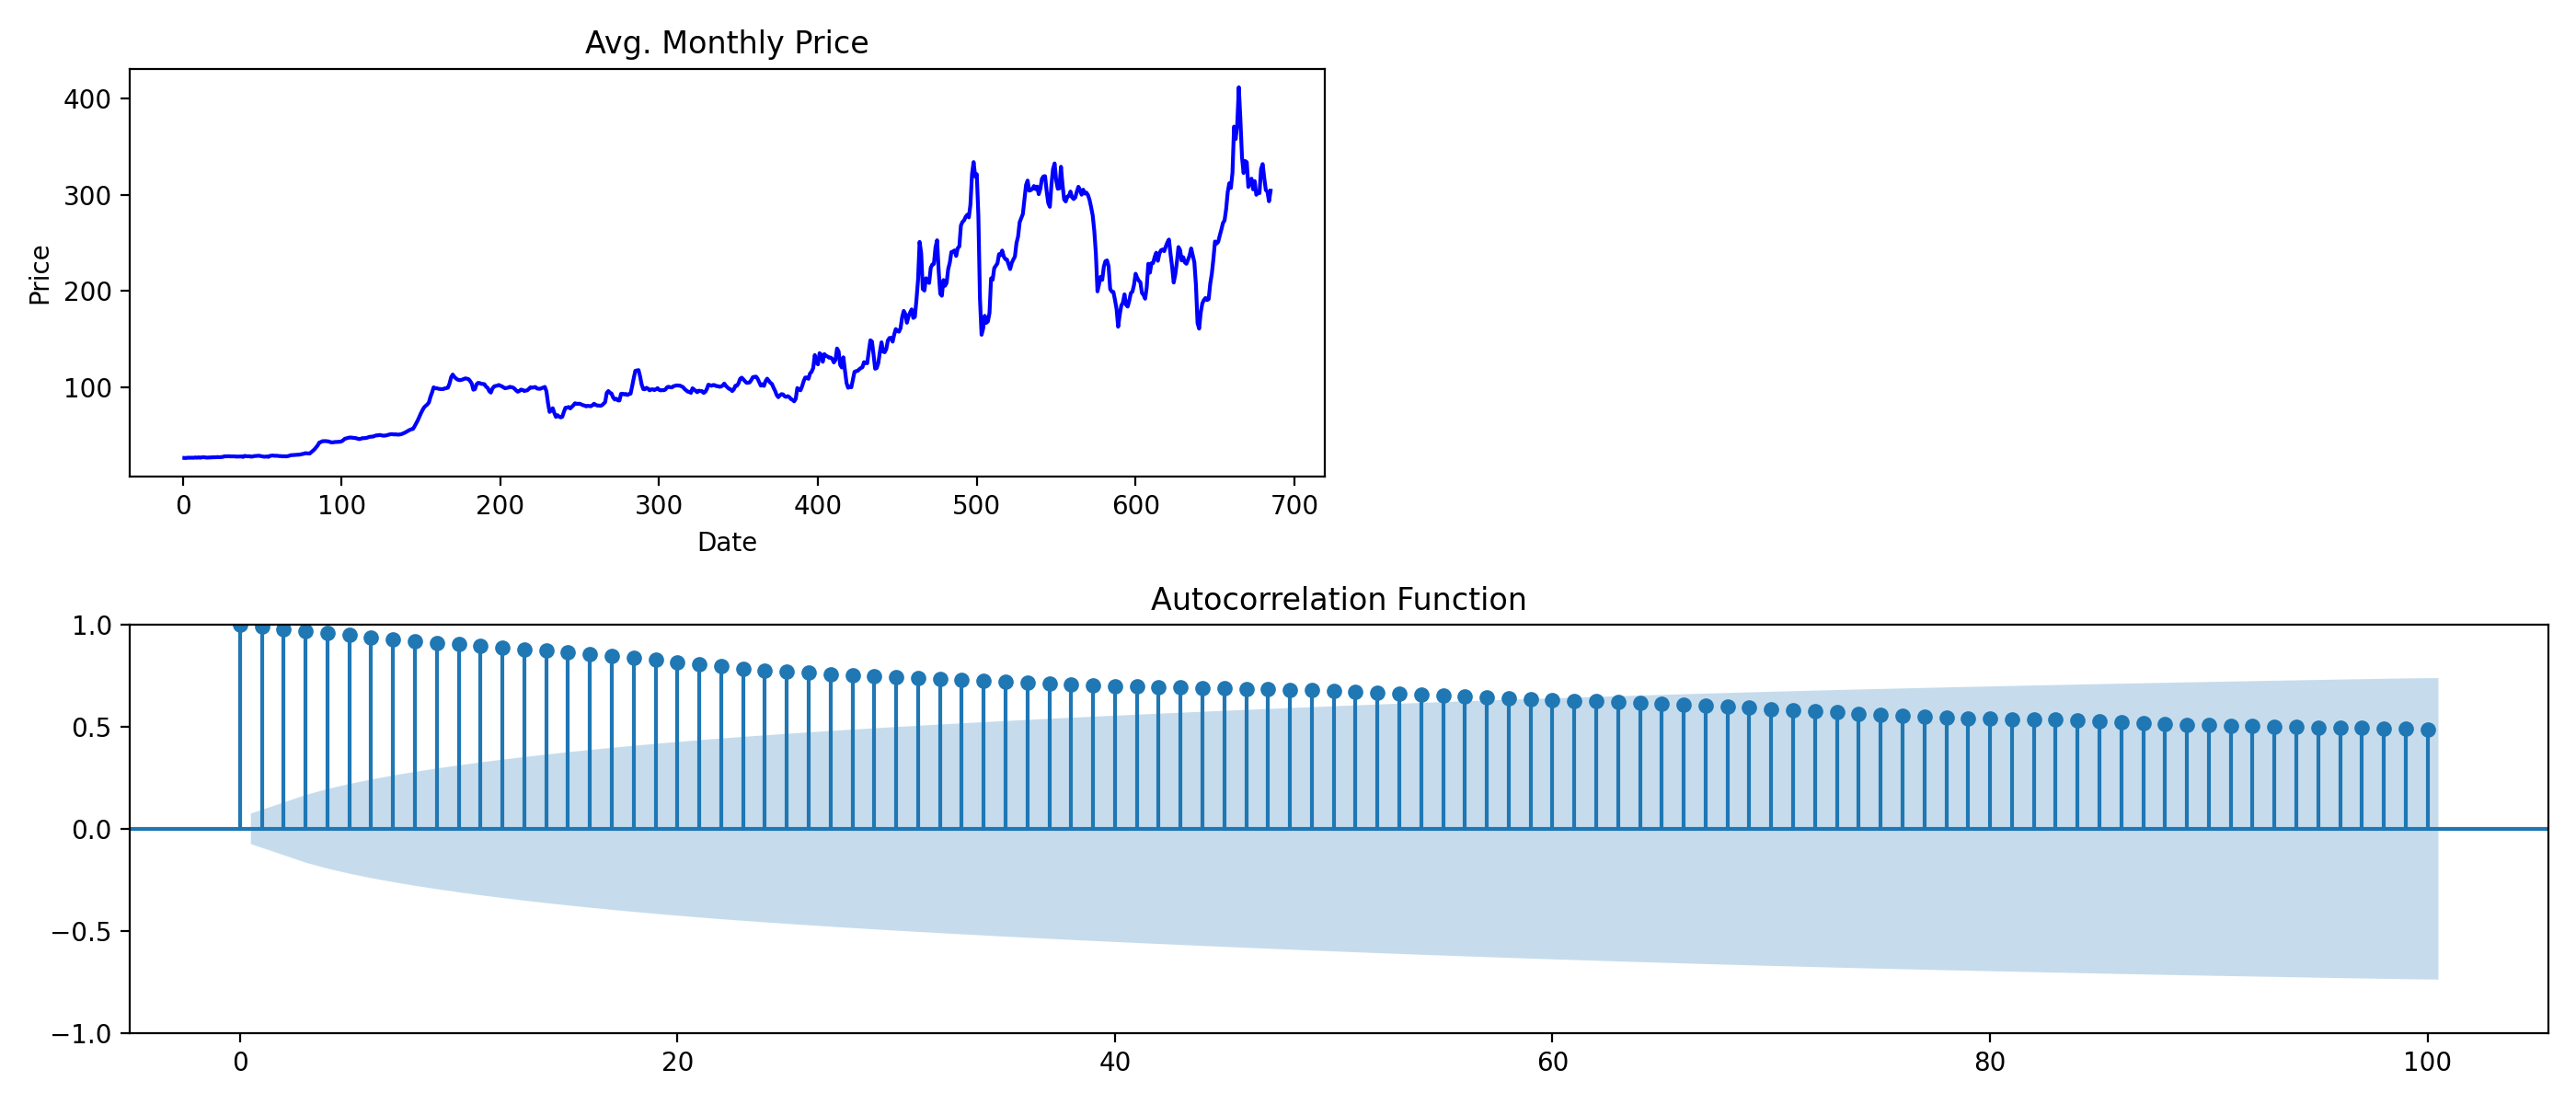

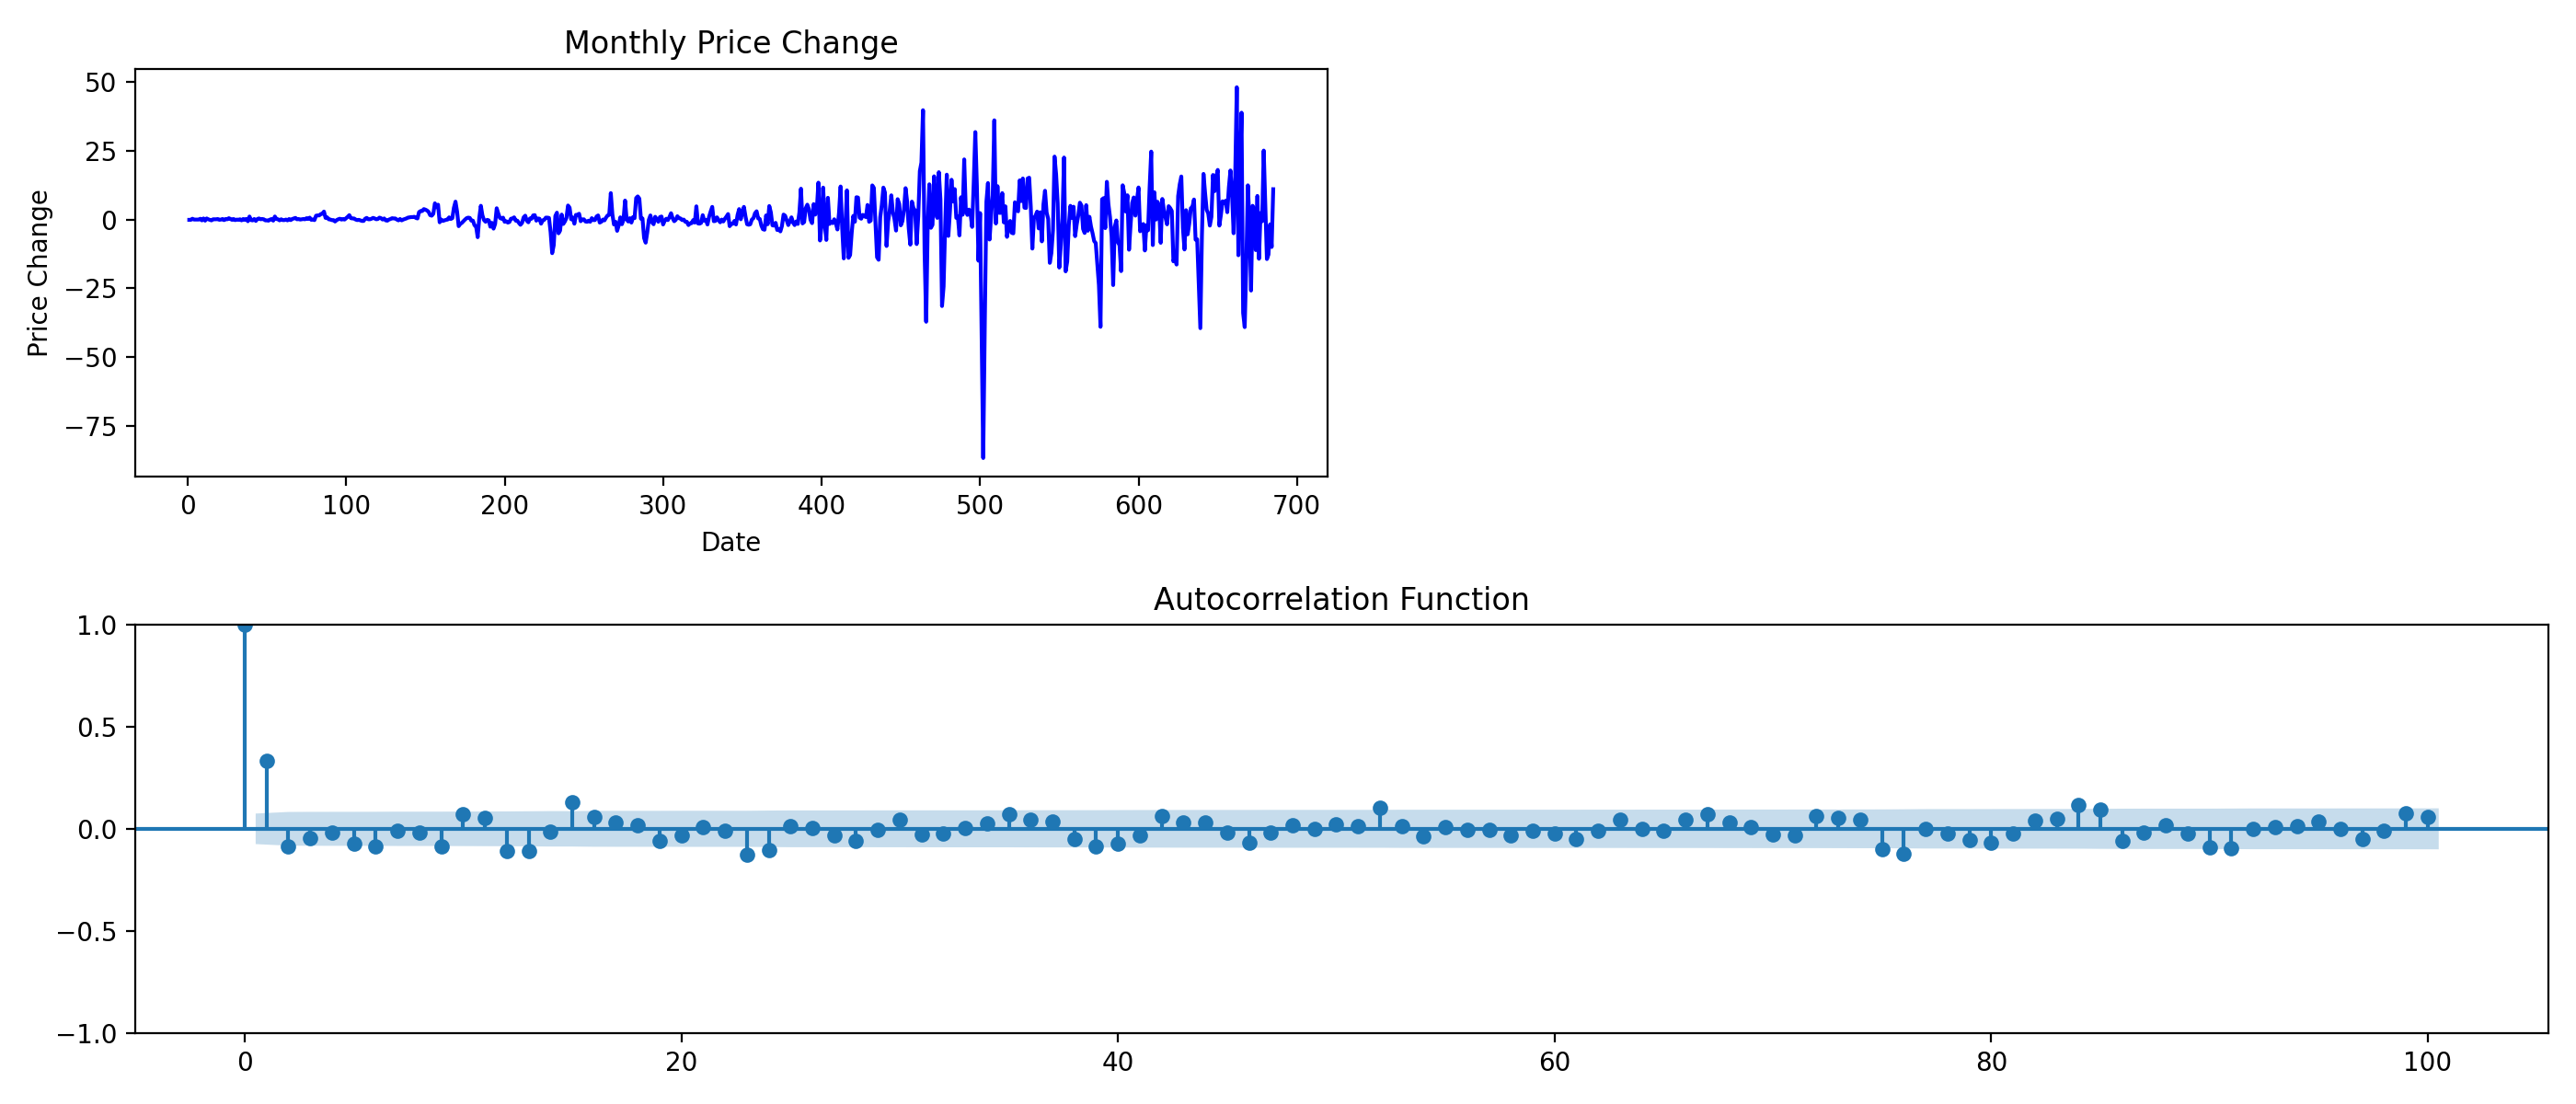

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df is your DataFrame containing the time series data

# Convert 'date' column to datetime format if it's not already
# df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
# df.set_index('date', inplace=True)

# Plot random walk model and autocorrelation function for 'Avg. Monthly Price'
plt.figure(figsize=(14, 6))

# Plot the time series
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Avg. Monthly Price'], color='blue')
plt.title('Avg. Monthly Price')
plt.xlabel('Date')
plt.ylabel('Price')

# # Plot the random walk model
# plt.subplot(2, 2, 2)
# random_walk = np.cumsum(df['Avg. Monthly Price'].diff().fillna(0))
# plt.plot(df.index, random_walk, color='red')
# plt.title('Random Walk Model')
# plt.xlabel('Date')
# plt.ylabel('Price')

# Plot the autocorrelation function
plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_acf(df['Avg. Monthly Price'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()

# Plot random walk model and autocorrelation function for 'Monthly Price Change'
plt.figure(figsize=(14, 6))

# Plot the time series
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Monthly Price Change'], color='blue')
plt.title('Monthly Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')

# # # Plot the random walk model
# plt.subplot(2, 2, 2)
# random_walk = np.cumsum(df['Monthly Price Change'].fillna(0))
# plt.plot(df.index, random_walk, color='red')
# plt.title('Random Walk Model')
# plt.xlabel('Date')
# plt.ylabel('Price Change')

# Plot the autocorrelation function
plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_acf(df['Monthly Price Change'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()


## Moving Average

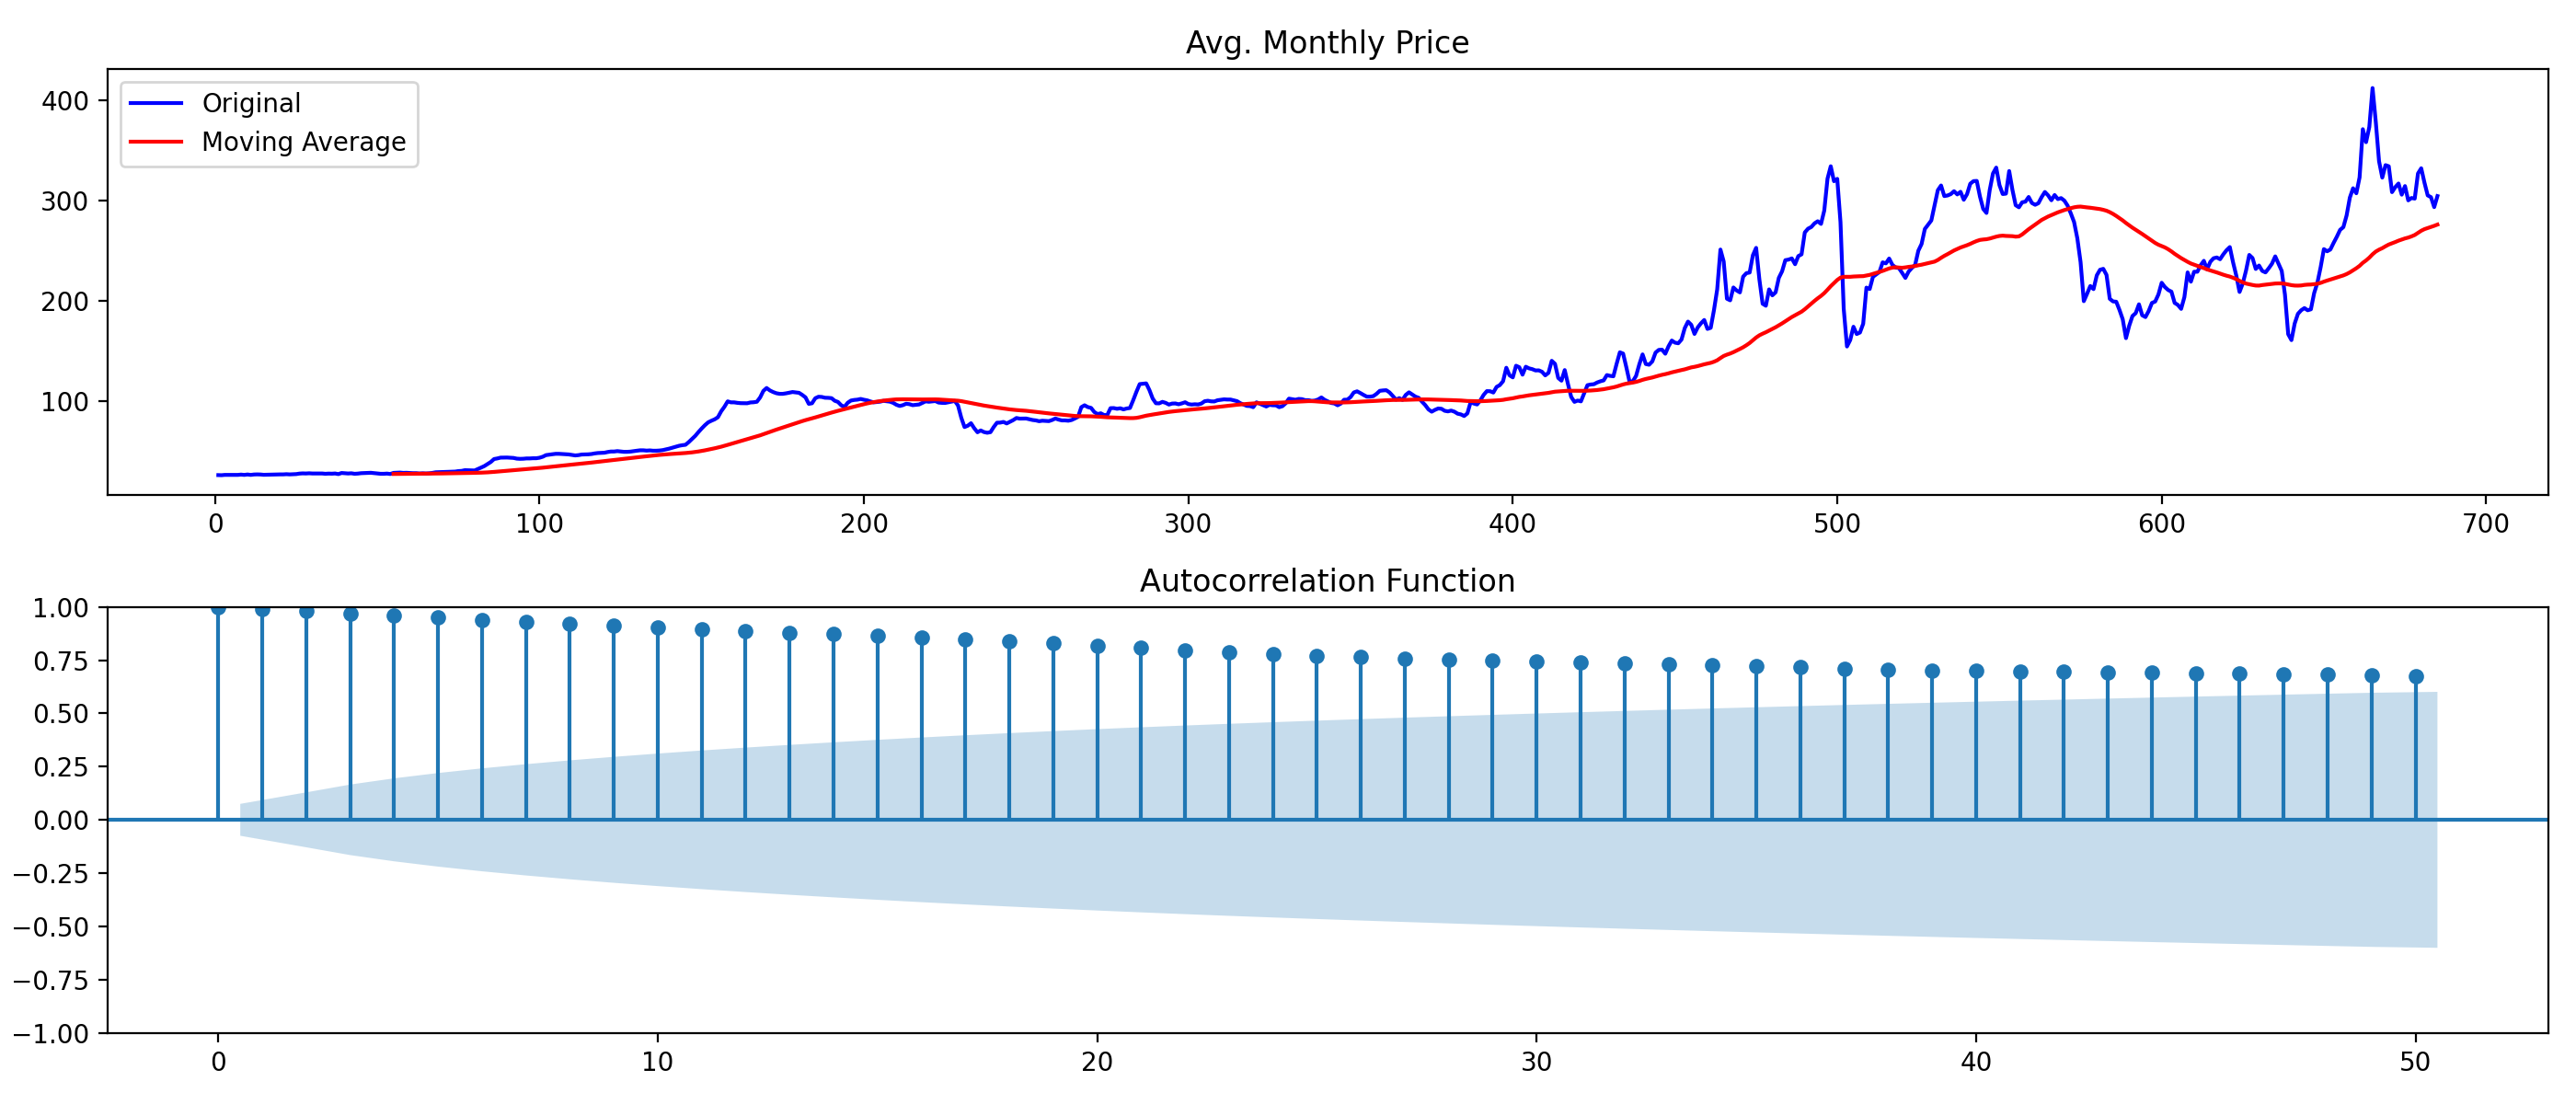

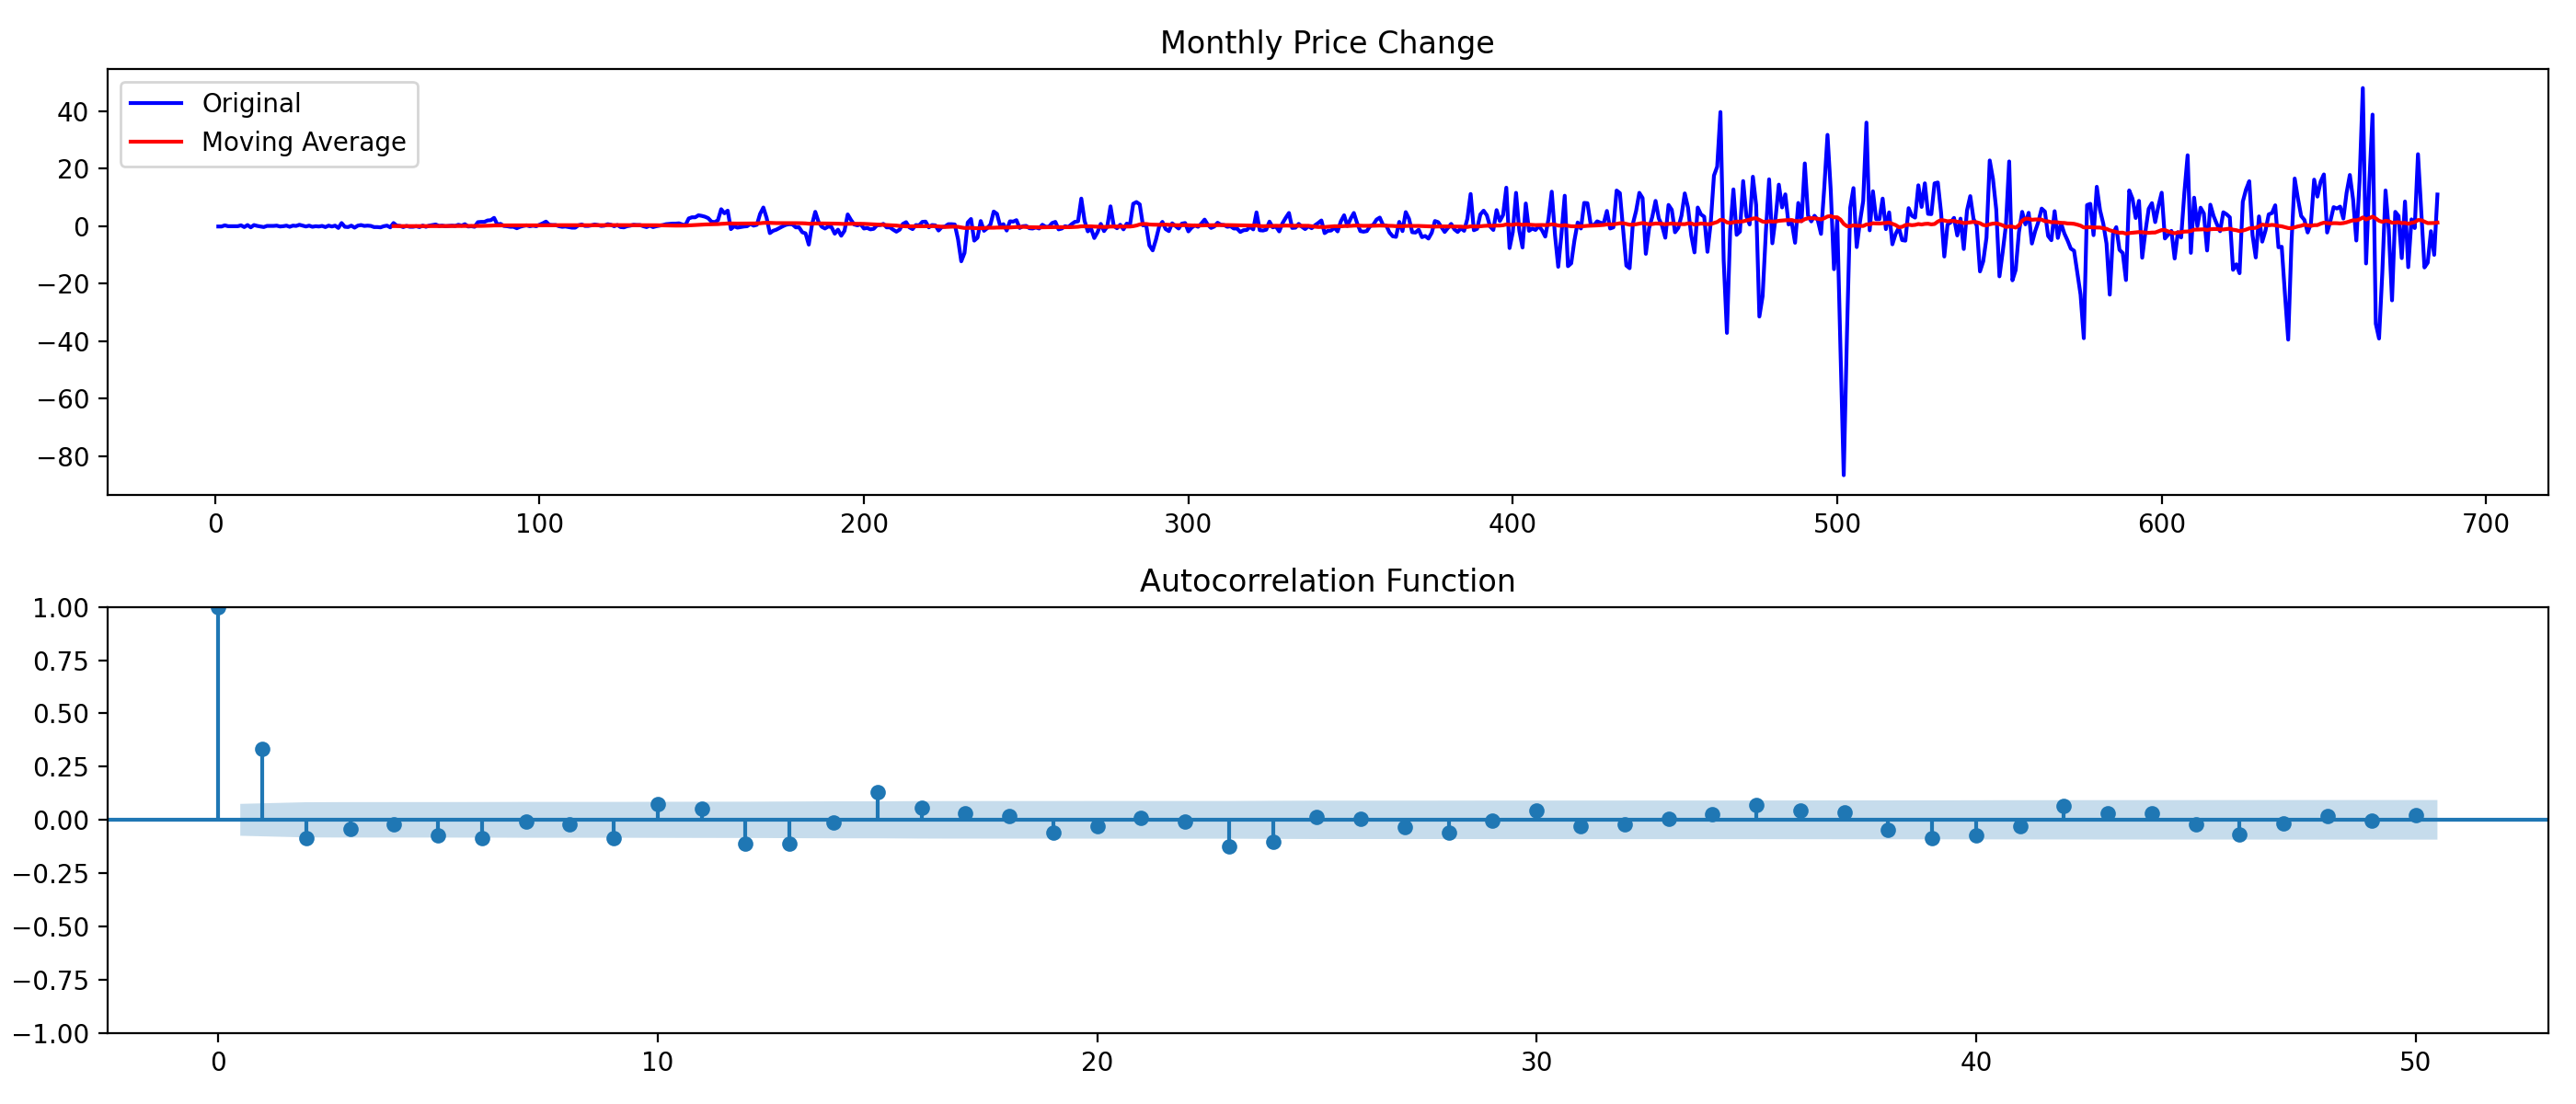

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define function for plotting moving average model and ACF
def plot_moving_avg_and_acf(data, window_size, title):
    # Calculate moving average
    rolling_mean = data.rolling(window=window_size).mean()

    # Plot time series and moving average
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Moving Average')
    plt.title(title)
    plt.legend()

    # Plot ACF
    plt.subplot(2, 1, 2)
    sm.graphics.tsa.plot_acf(data, lags=50, ax=plt.gca())
    plt.title('Autocorrelation Function')

    plt.tight_layout()
    plt.show()

# Plot moving average model and ACF for 'Avg. Monthly Price'
plot_moving_avg_and_acf(df['Avg. Monthly Price'], window_size=55, title='Avg. Monthly Price')

# Plot moving average model and ACF for 'Monthly Price Change'
plot_moving_avg_and_acf(df['Monthly Price Change'], window_size=55, title='Monthly Price Change')


## Noise in monthly price change

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Monthly Price Change'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

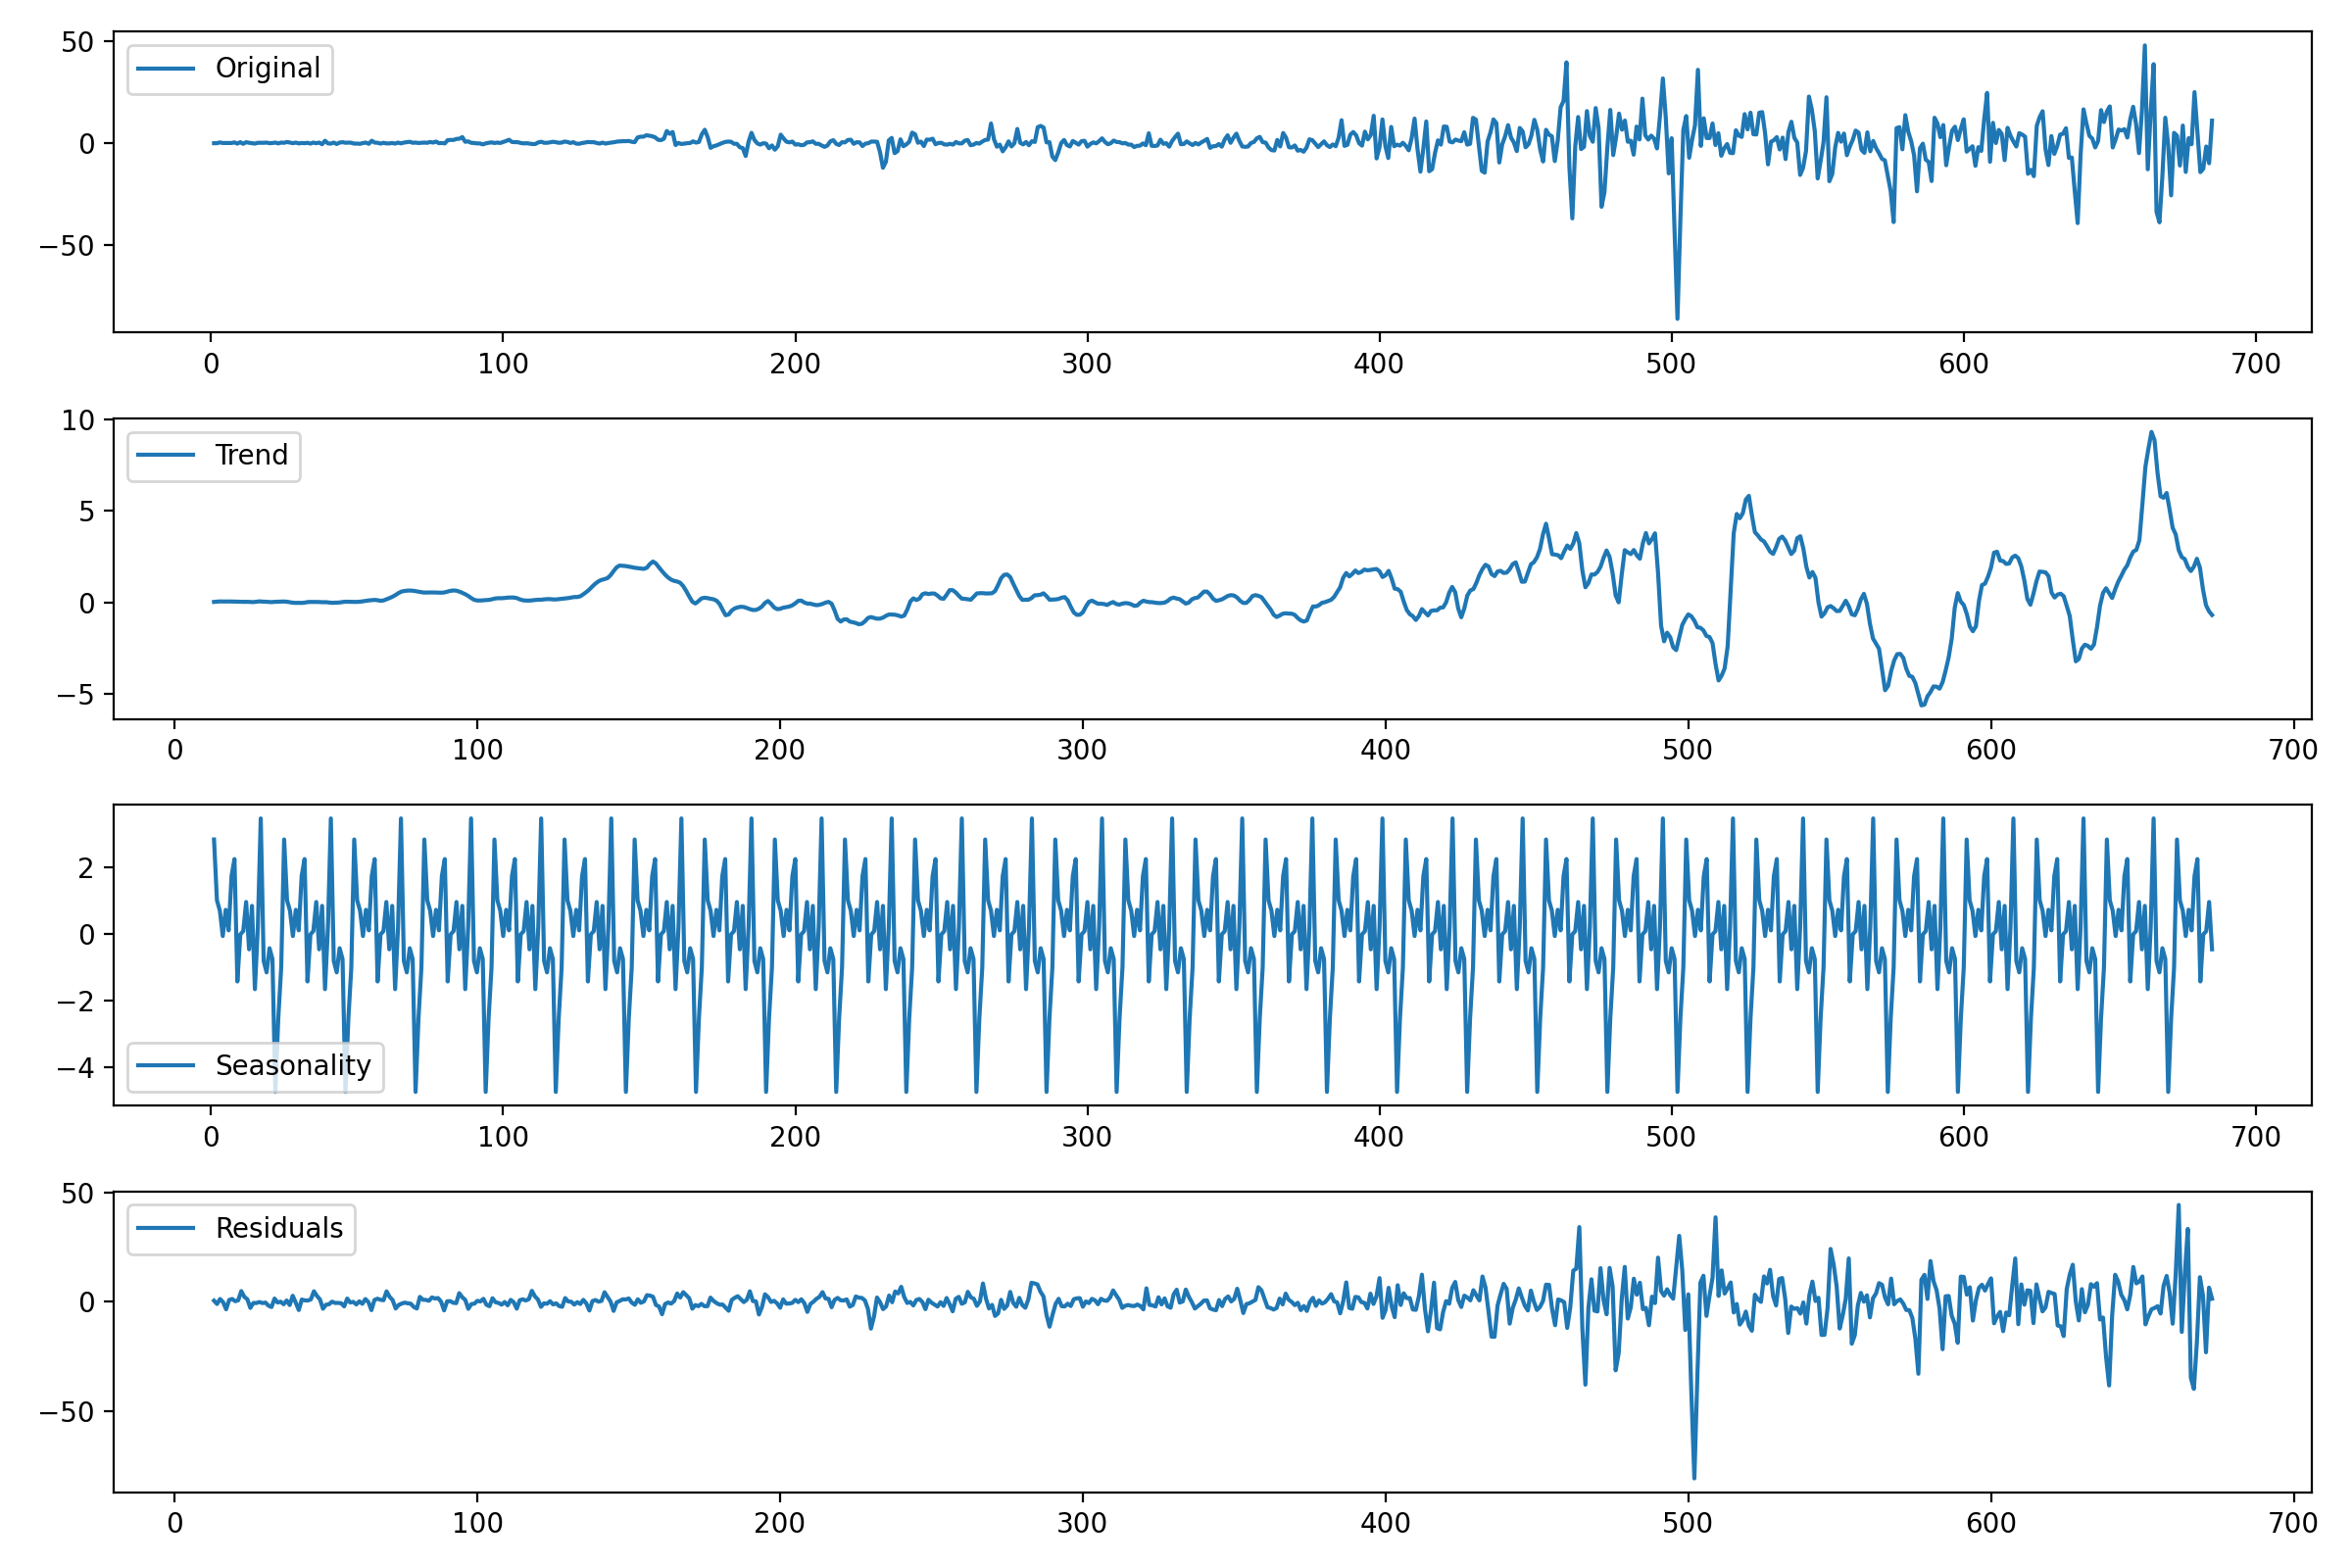

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
df['Monthly Price Change'].plot(label='Original')
plt.legend(loc='best')
plt.subplot(412)
trend.plot(label='Trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

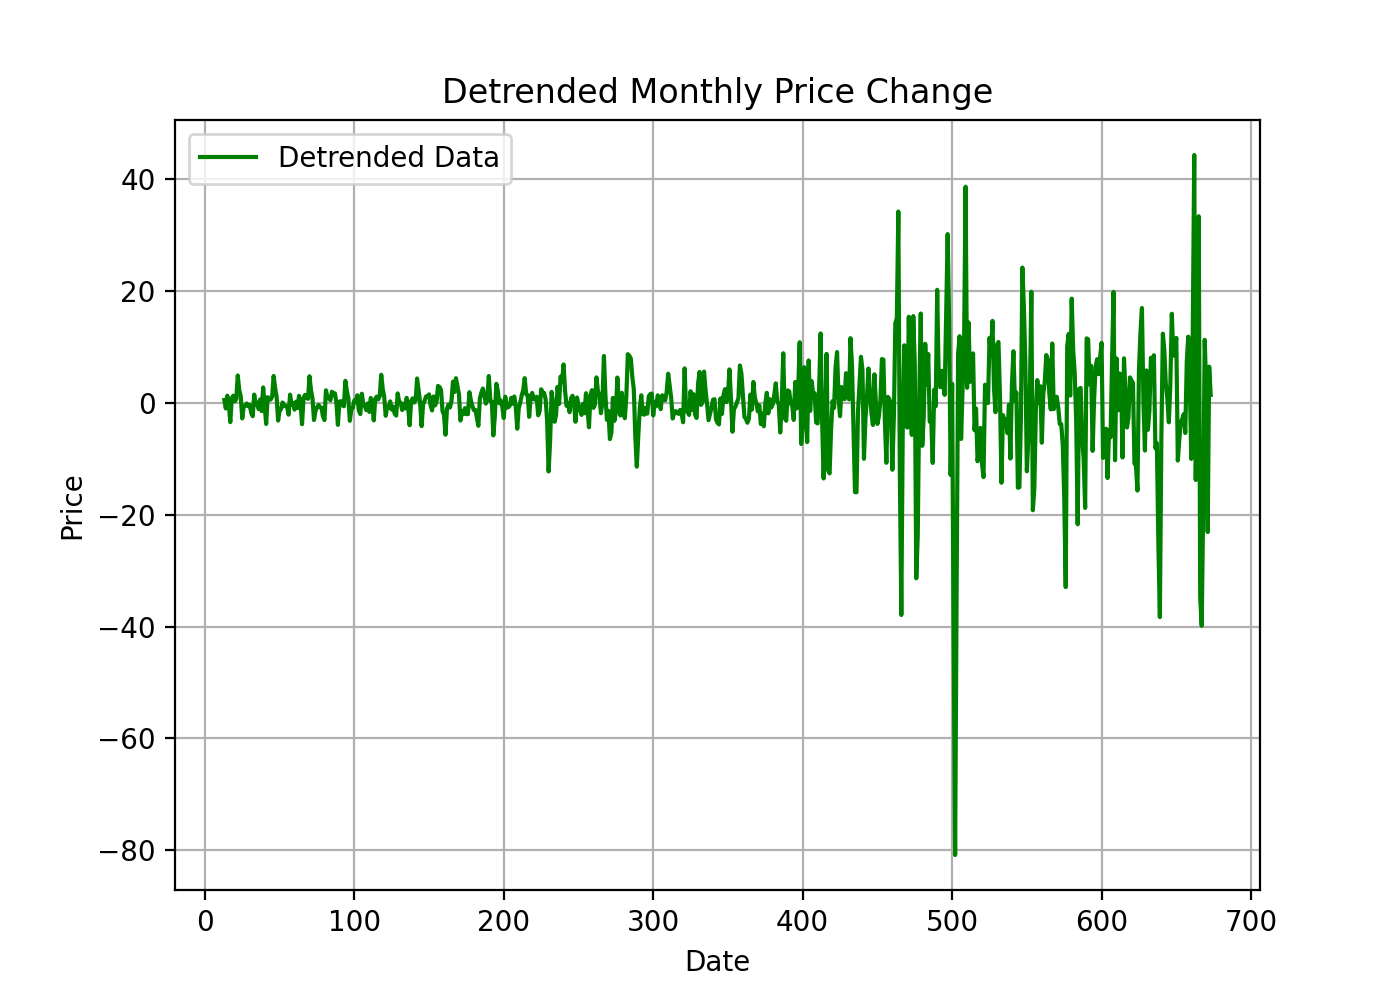

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Subtracting trend and seasonal components from the original data
df['detrended_data'] = df['Monthly Price Change'] - trend - seasonal
# Plotting the detrended data
plt.figure(figsize=(7, 5))

# Plot for detrended data
df['detrended_data'].plot(label='Detrended Data', color='green')
plt.legend(loc='best')
plt.title('Detrended Monthly Price Change')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

In [ ]:
# Check for missing values, infinite values, or NaNs in 'Monthly Price Change'
print("Number of missing values:", df['detrended_data'].isnull().sum())
print("Number of infinite values:", np.isinf(df['detrended_data']).sum())
print("Number of NaNs:", np.isnan(df['detrended_data']).sum())

Number of missing values: 24
Number of infinite values: 0
Number of NaNs: 24


In [ ]:
df.dropna(subset=['detrended_data'], inplace=True)

Detrended Data:
Mean: -0.0082314688510436
Standard Deviation: 8.456986741118898


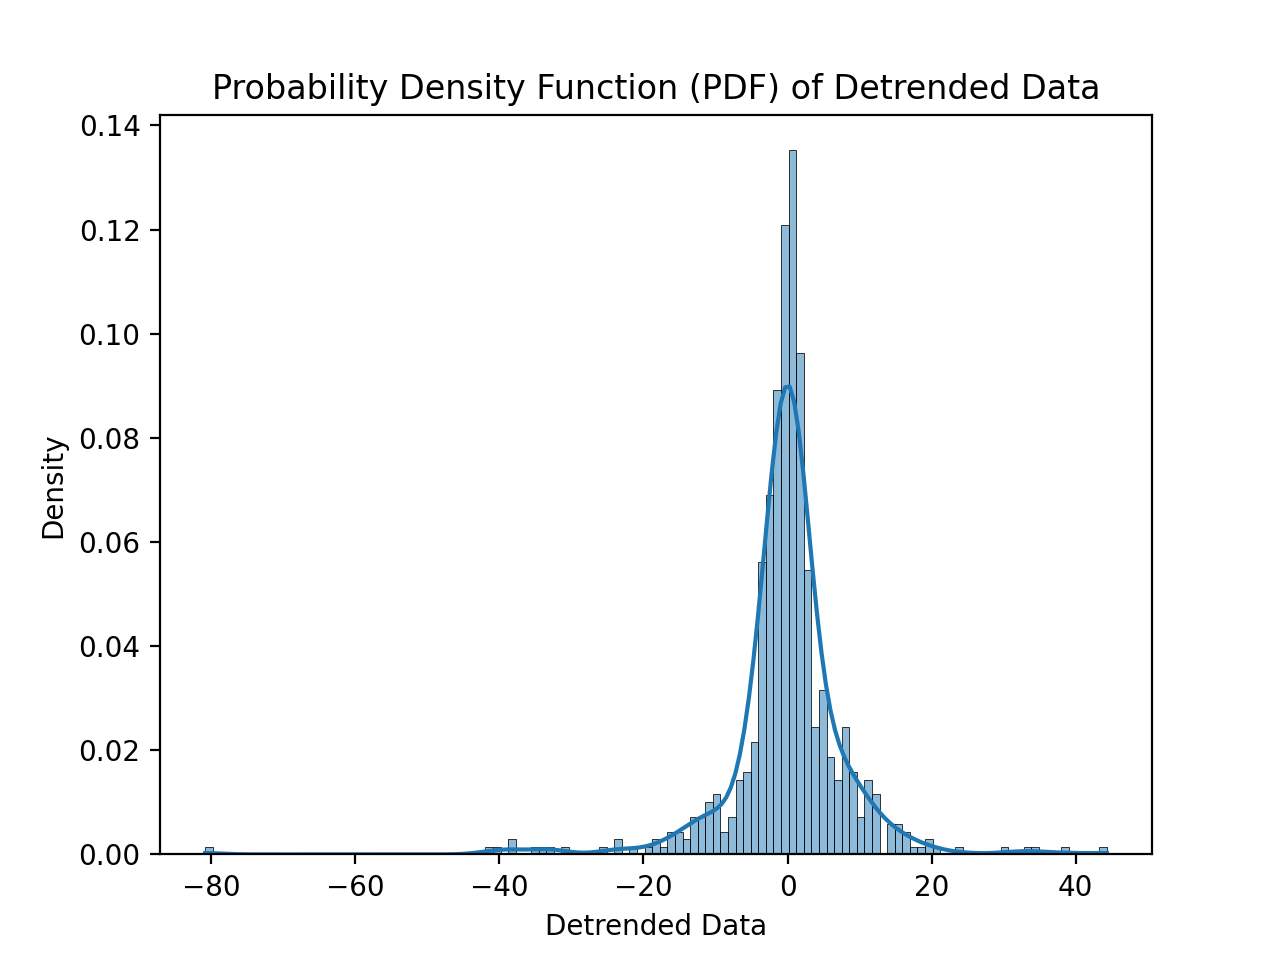

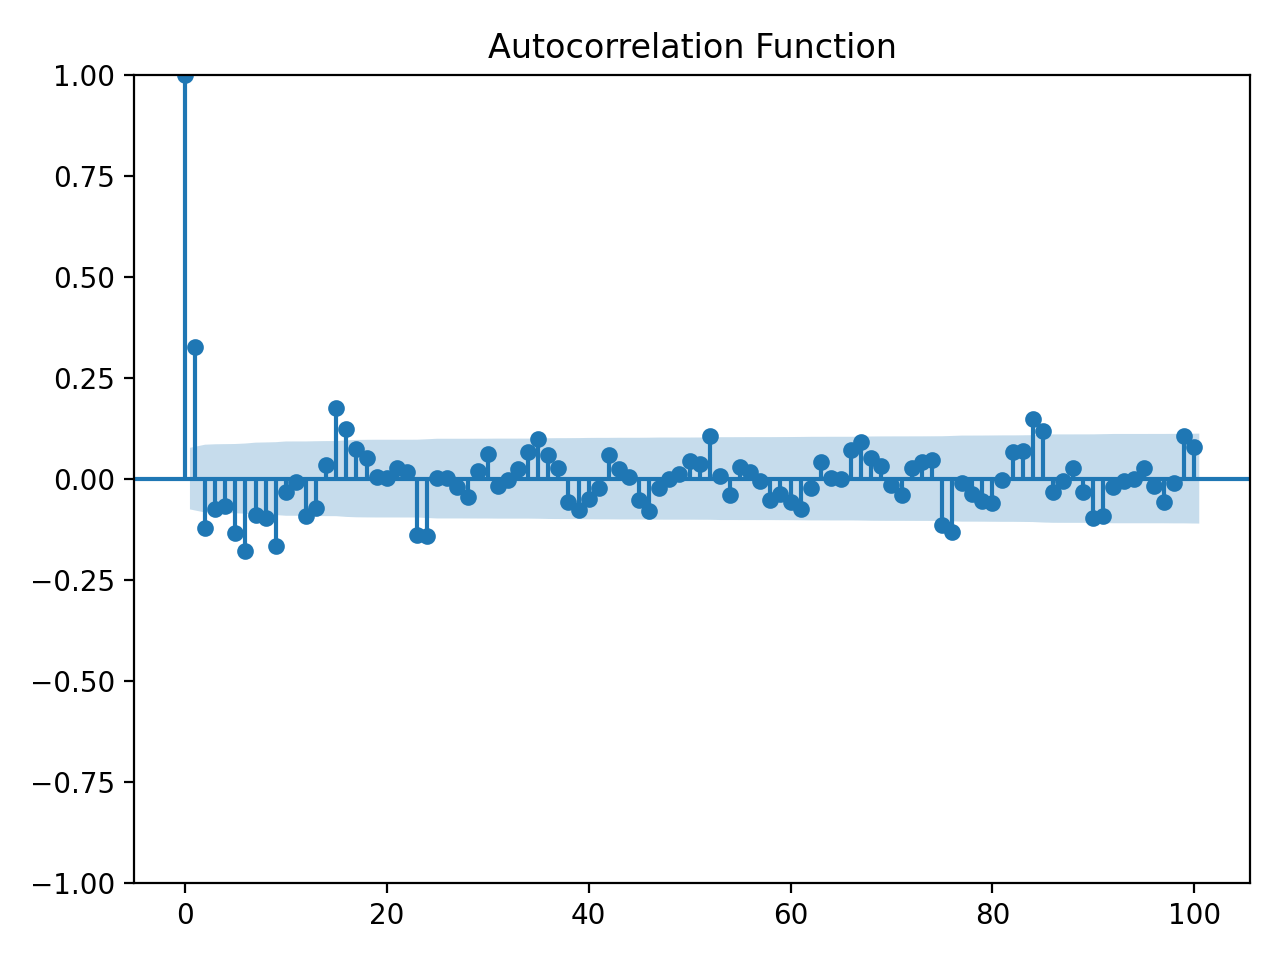

In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

# Basic statistics for detrended_data
print("Detrended Data:")
print("Mean:", df['detrended_data'].mean())
print("Standard Deviation:", df['detrended_data'].std())

# Plot PDF using seaborn
sns.histplot(df['detrended_data'], kde=True, stat='density')

# Add labels and title
plt.xlabel('Detrended Data')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Detrended Data')

# Show plot
plt.show()

sm.graphics.tsa.plot_acf(df['detrended_data'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()


## Moving avg on monthly price change noise

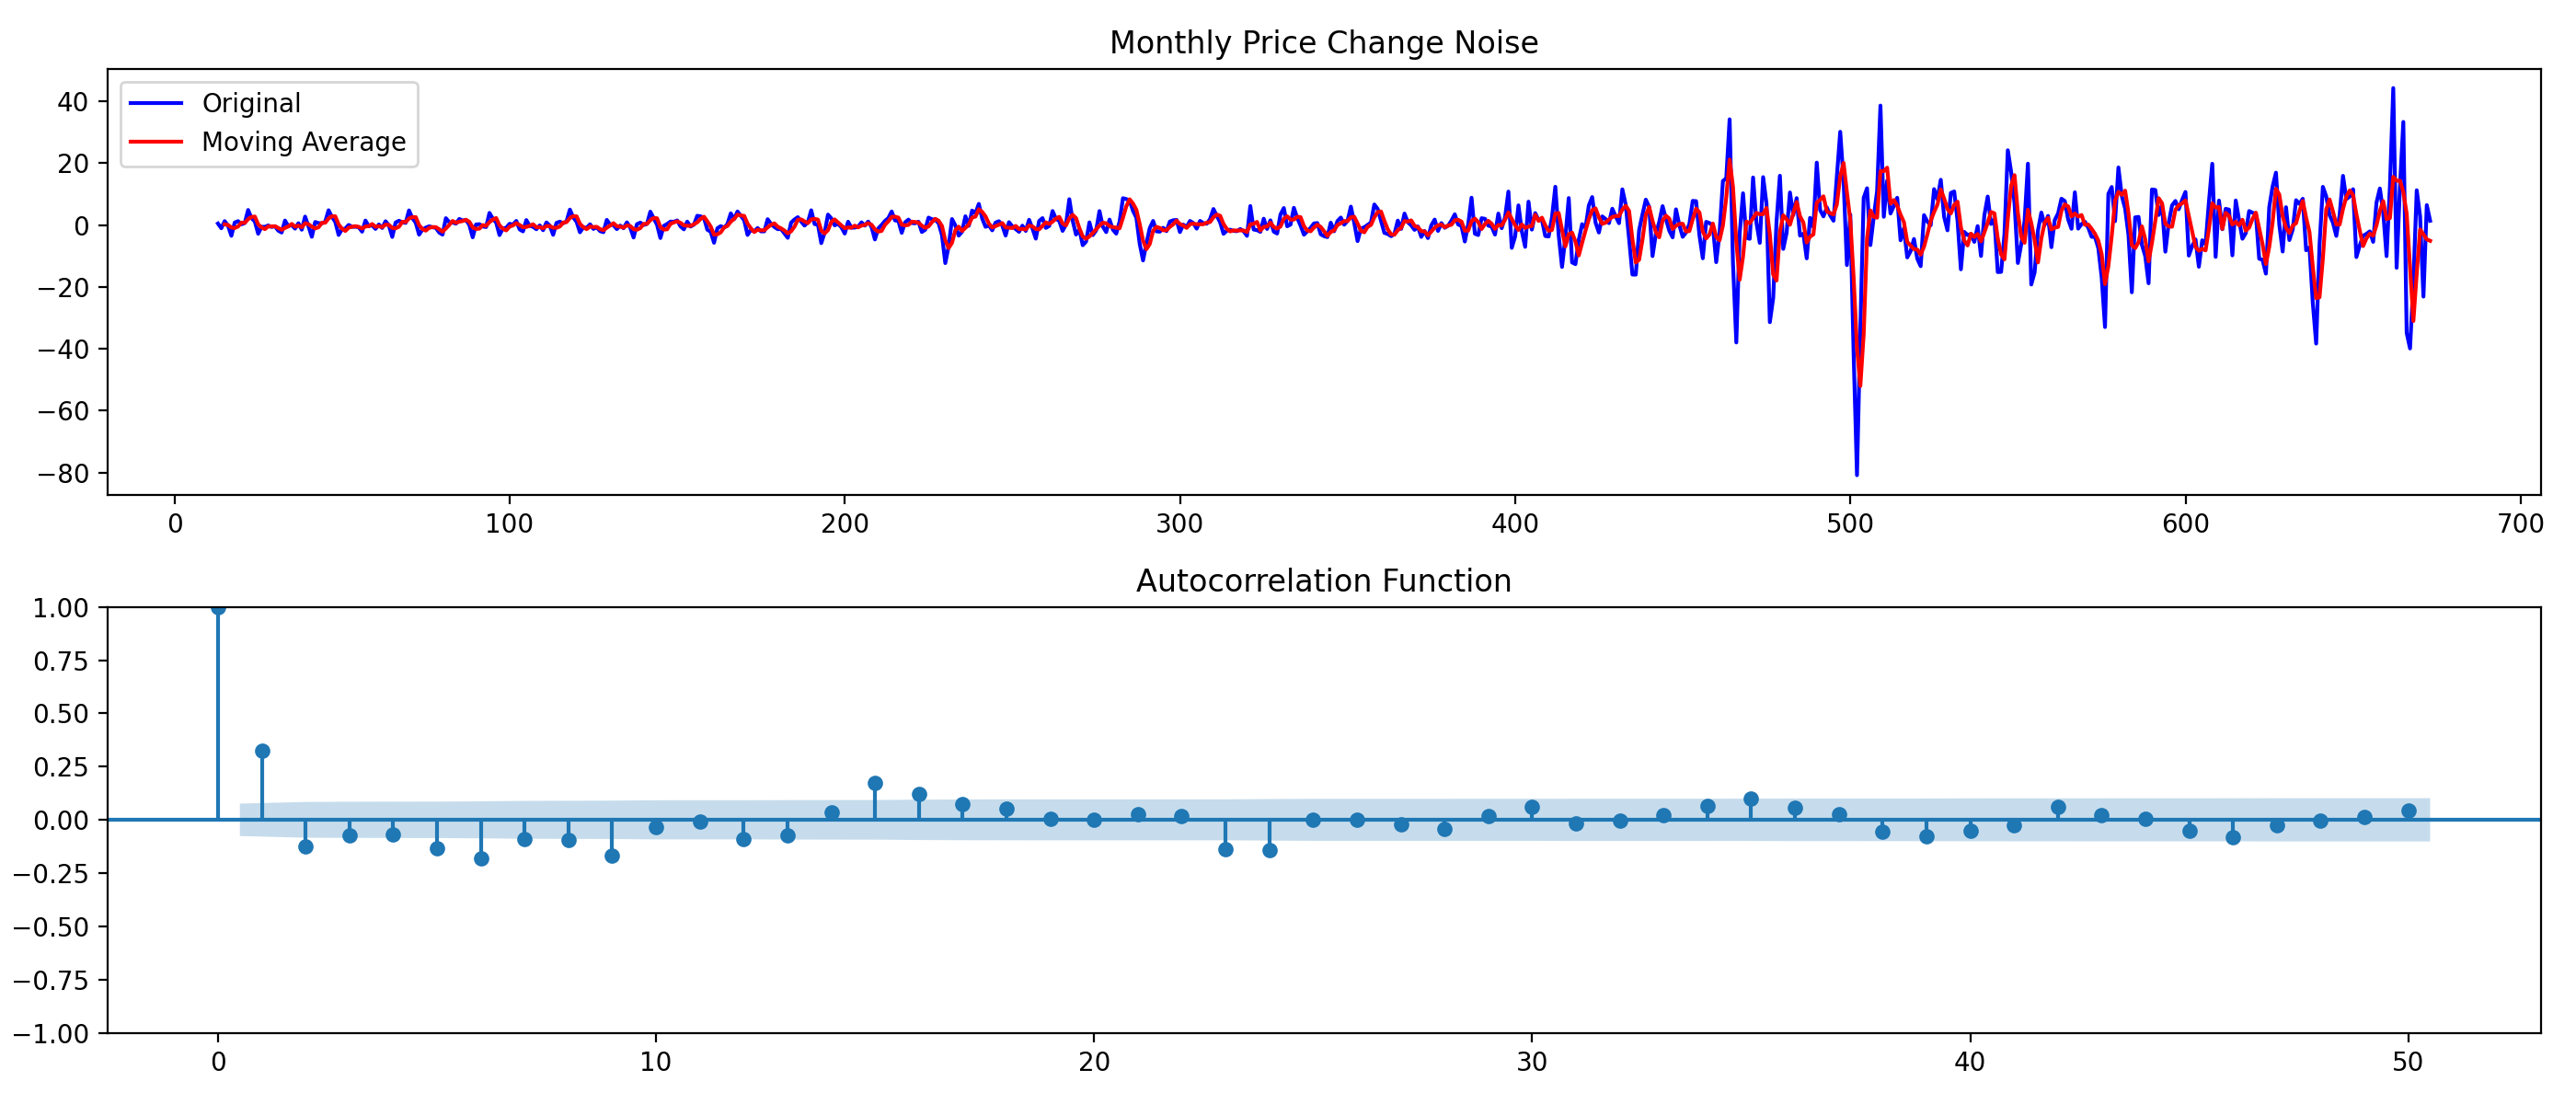

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define function for plotting moving average model and ACF
def plot_moving_avg_and_acf(data, window_size, title):
    # Calculate moving average
    rolling_mean = data.rolling(window=window_size).mean()

    # Plot time series and moving average
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Moving Average')
    plt.title(title)
    plt.legend()

    # Plot ACF
    plt.subplot(2, 1, 2)
    sm.graphics.tsa.plot_acf(data, lags=50, ax=plt.gca())
    plt.title('Autocorrelation Function')

    plt.tight_layout()
    plt.show()

# Plot moving average model and ACF for 'Avg. Monthly Price'
plot_moving_avg_and_acf(df['detrended_data'], window_size=3, title='Monthly Price Change Noise')

##Log difference of monthly price change


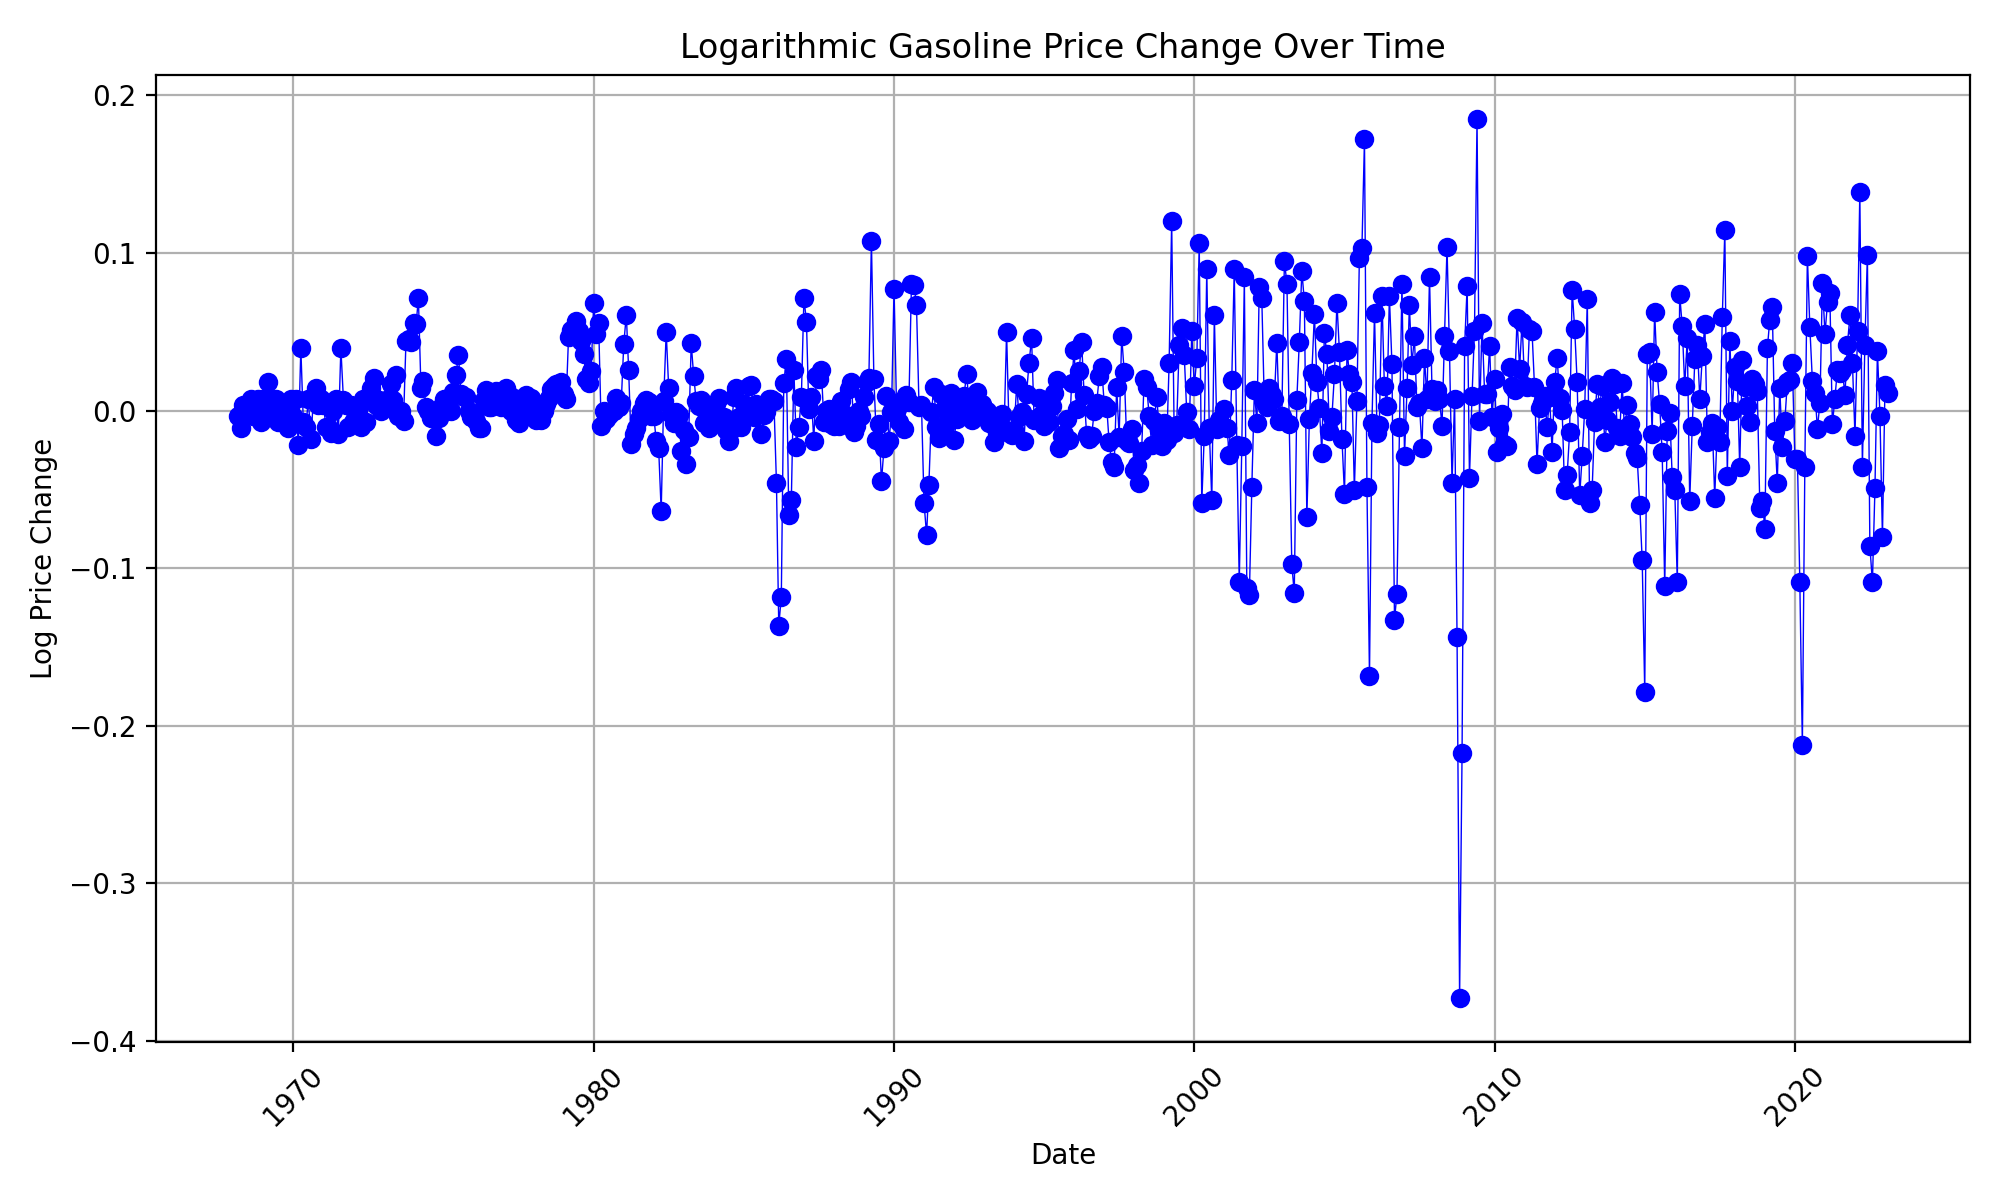

In [ ]:
import math

# Calculate the log of 'Avg. Monthly Price' column and store it in a new column
df['Log Avg. Monthly Price'] = df['Avg. Monthly Price'].apply(lambda x: None if x == 0 else math.log(x))

# Calculate the difference of logarithm of consecutive elements
df['Log Price Change'] = df['Log Avg. Monthly Price'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Log Price Change'], color='blue', marker='o', linestyle='-',linewidth='0.5')
plt.title('Logarithmic Gasoline Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Log Price Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.dropna(subset=['Log Price Change'], inplace=True)

Stationarity Check

In [ ]:
adf_test(df['Log Price Change'])
kpss_test(df['Log Price Change'])

Results of Dickey-Fuller Test:
Test Statistic                -8.157634e+00
p-value                        9.326813e-13
#Lags Used                     1.100000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.059348
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-11-3744fc511bfb>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



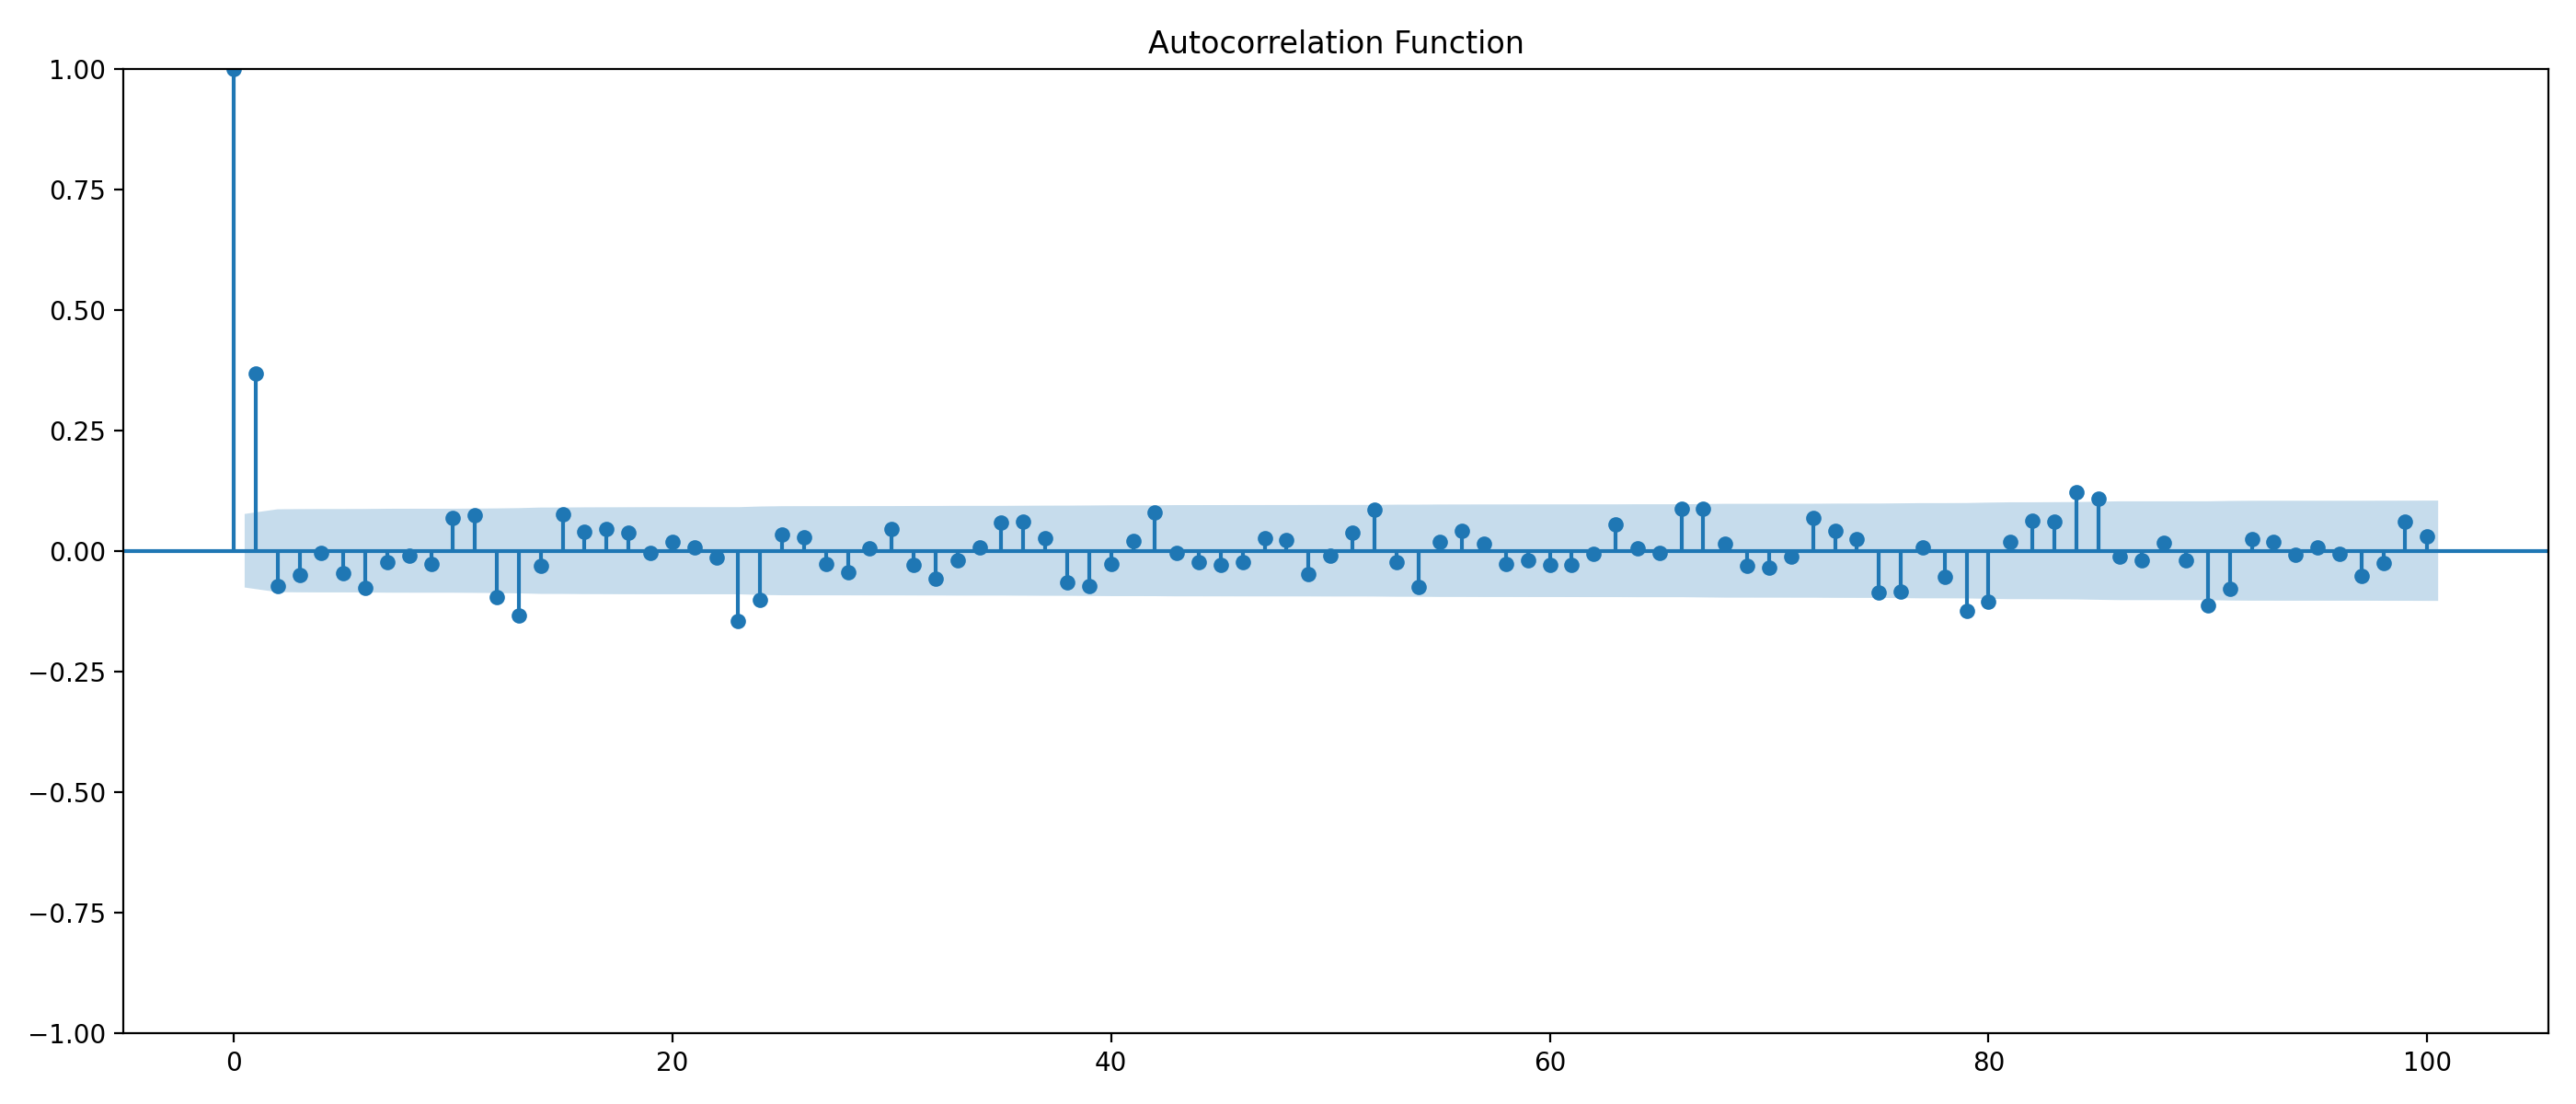

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(14, 6))
sm.graphics.tsa.plot_acf(df['Log Price Change'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()

Trend and seasonality in log monthly price change

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Log Price Change'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

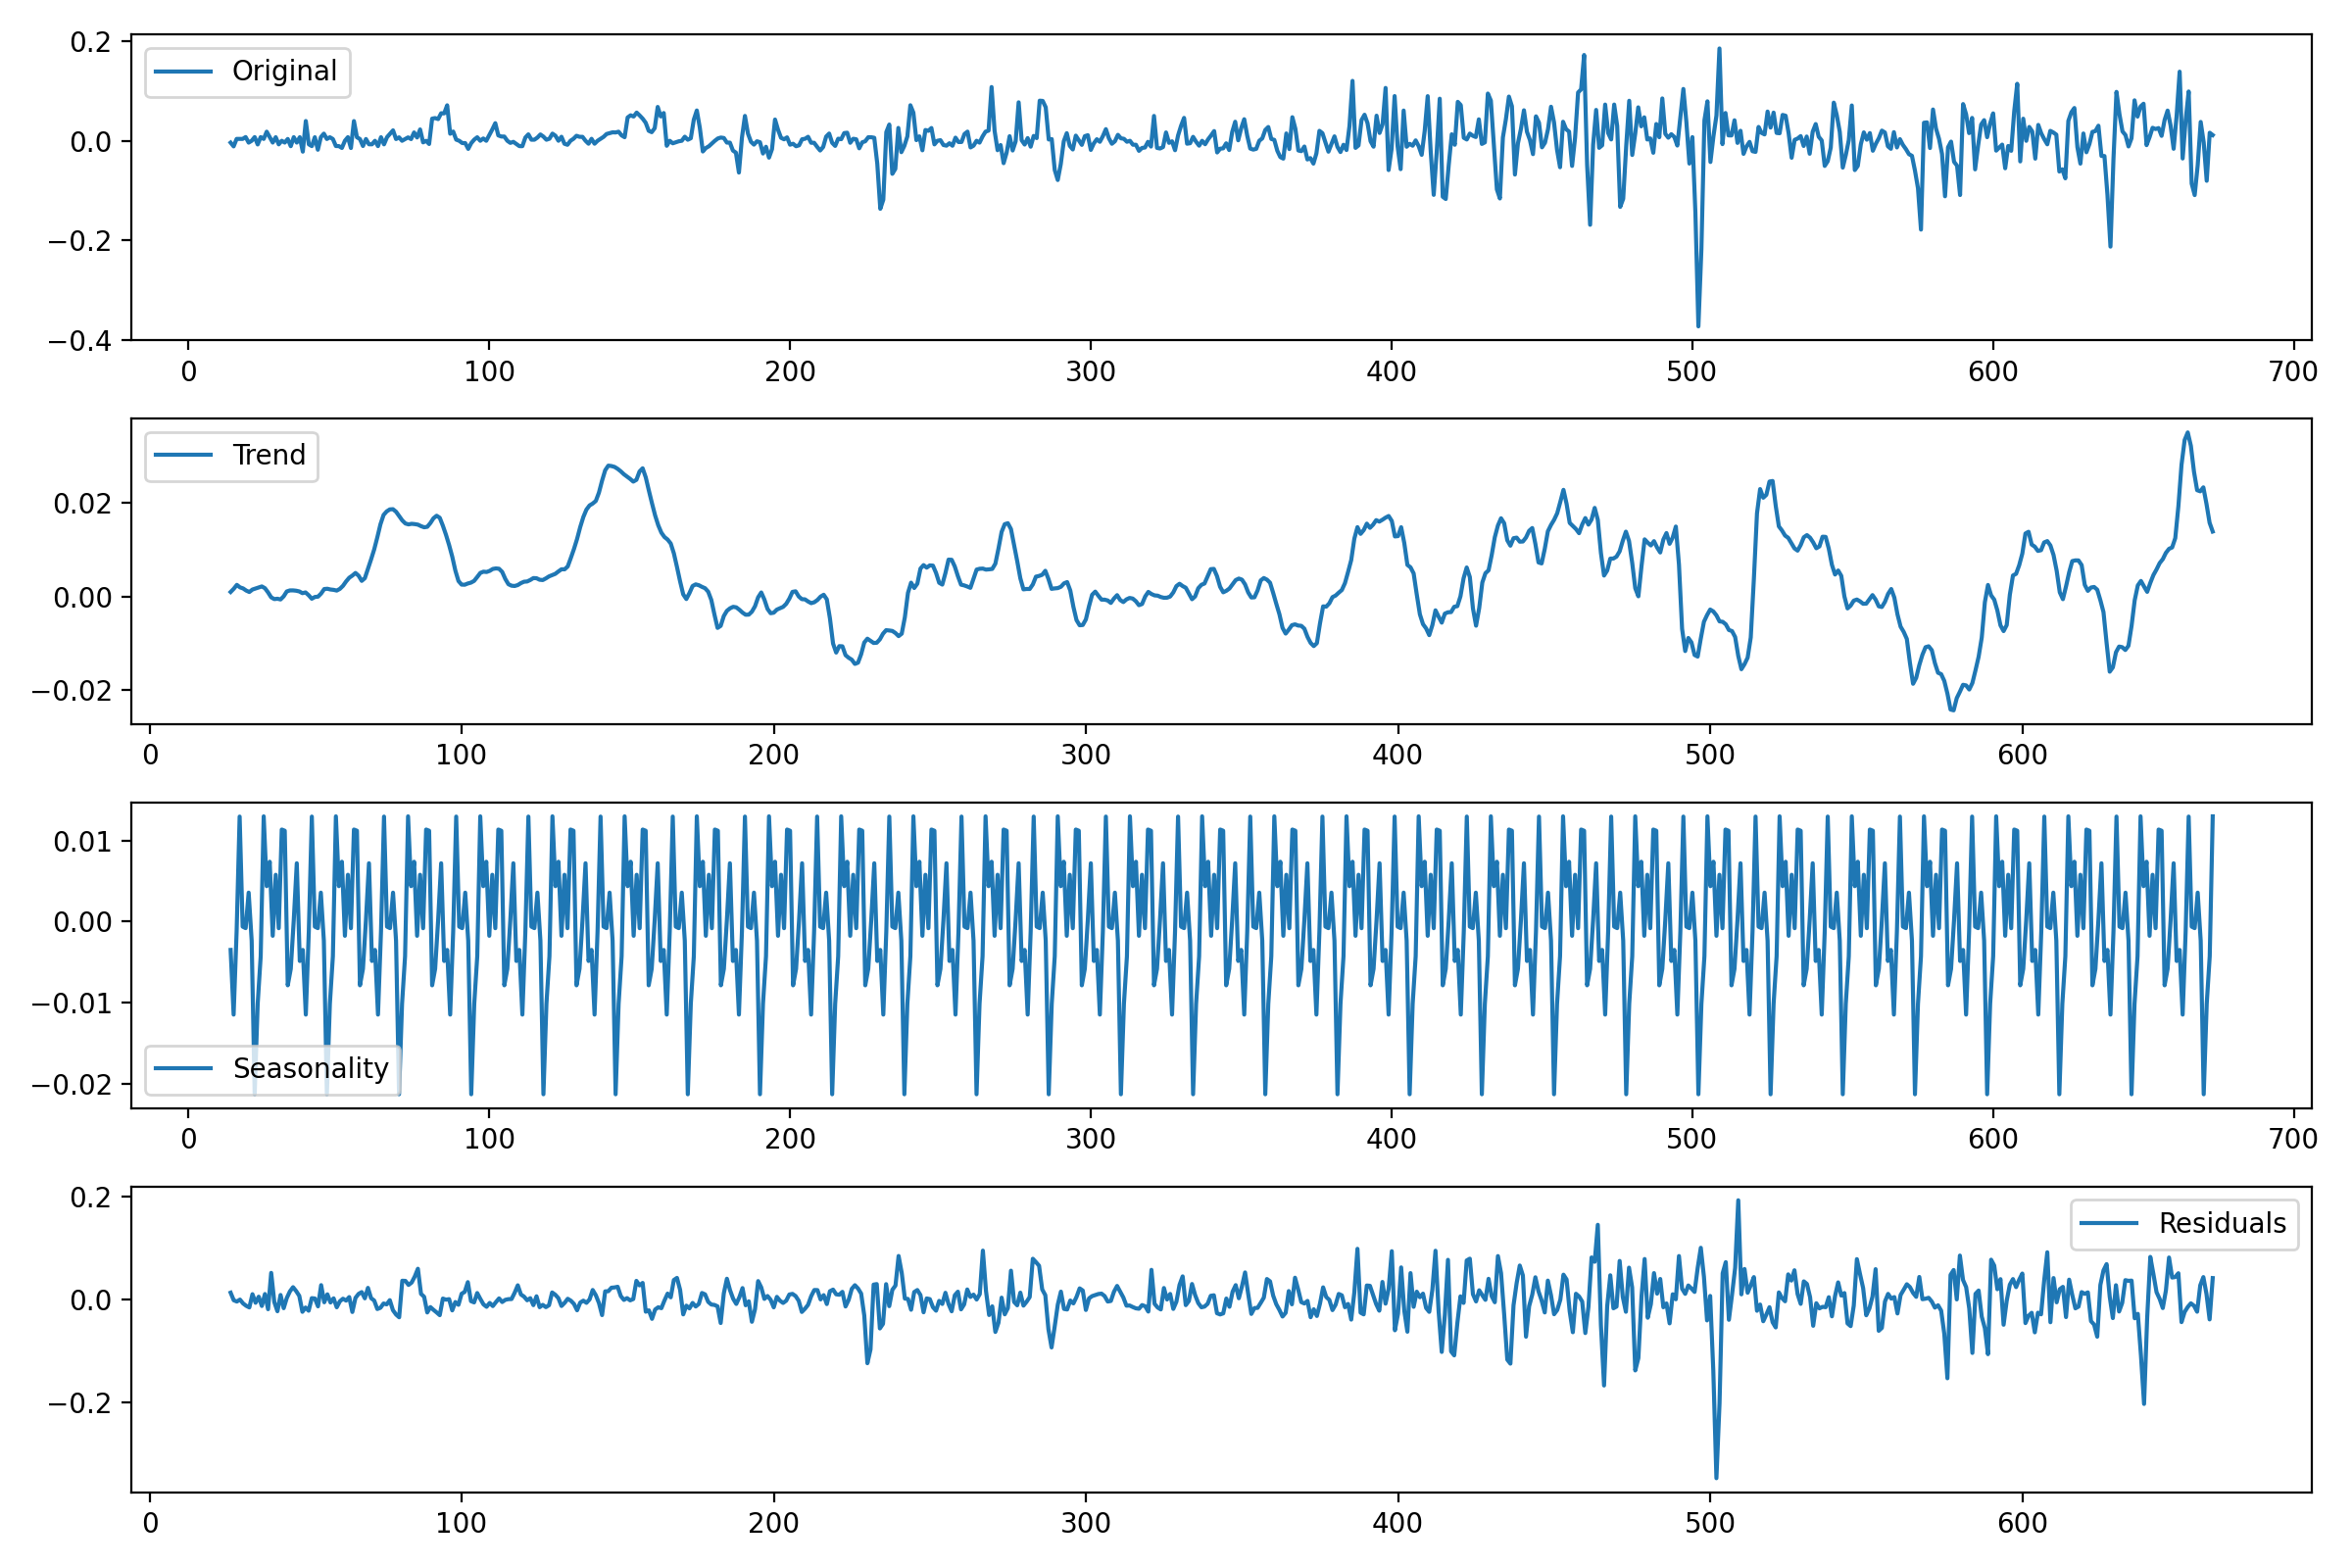

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
df['Log Price Change'].plot(label='Original')
plt.legend(loc='best')
plt.subplot(412)
trend.plot(label='Trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

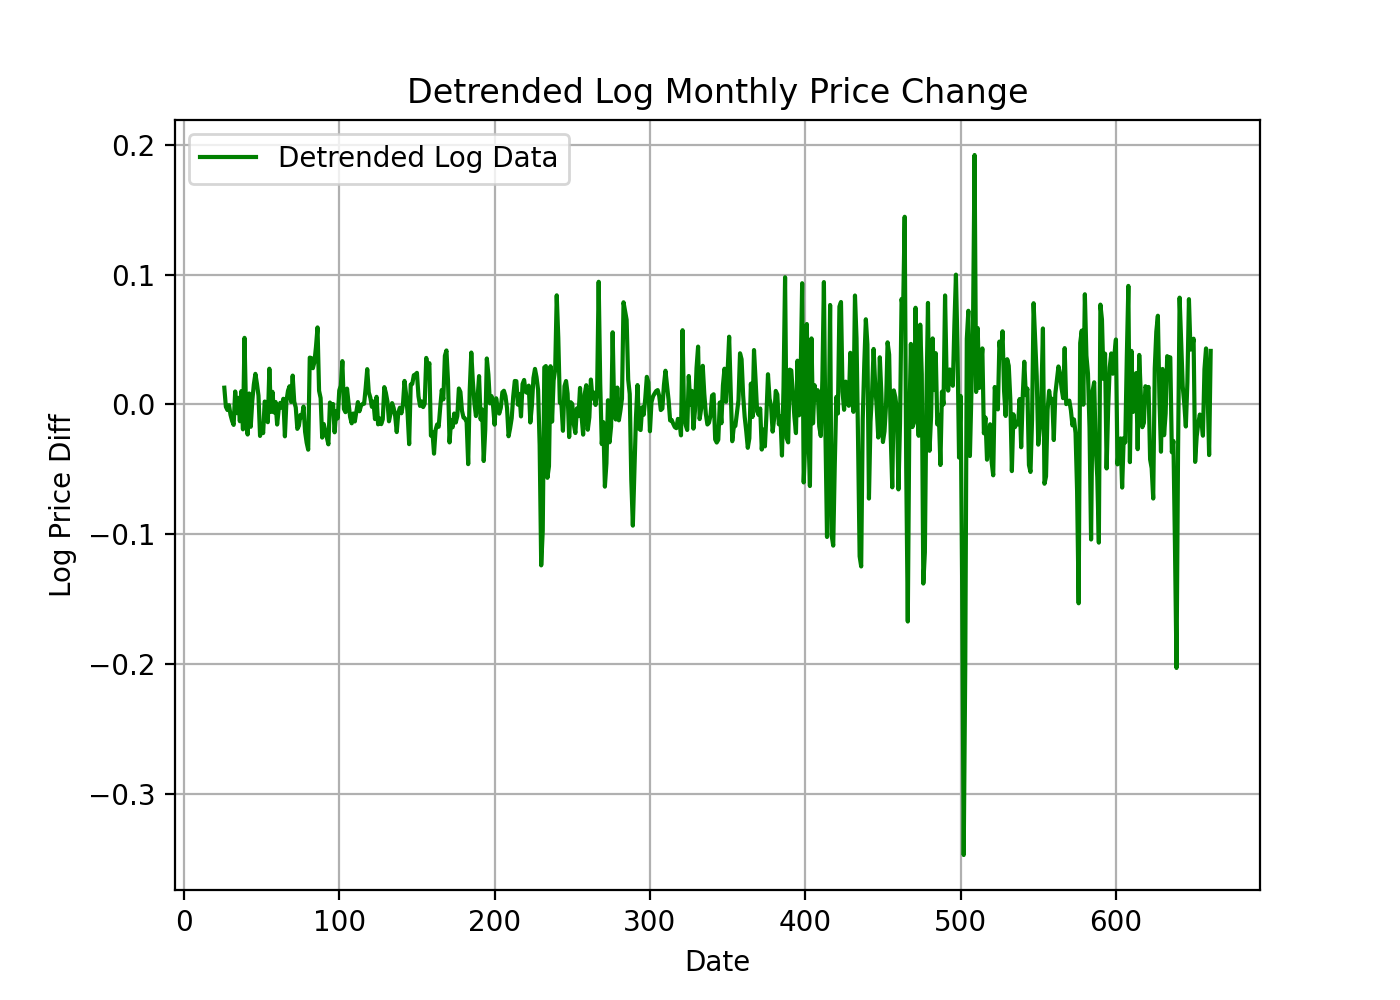

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Subtracting trend and seasonal components from the original data
df['detrended_log_data'] = df['Log Price Change'] - trend - seasonal
# Plotting the detrended data
plt.figure(figsize=(7, 5))

# Plot for detrended data
df['detrended_log_data'].plot(label='Detrended Log Data', color='green')
plt.legend(loc='best')
plt.title('Detrended Log Monthly Price Change')
plt.xlabel('Date')
plt.ylabel('Log Price Diff')
plt.grid(True)

In [ ]:
df.dropna(subset=['detrended_log_data'], inplace=True)

Detrended Log Data:
Mean: 3.938717610751128e-05
Standard Deviation: 0.04069494777712663


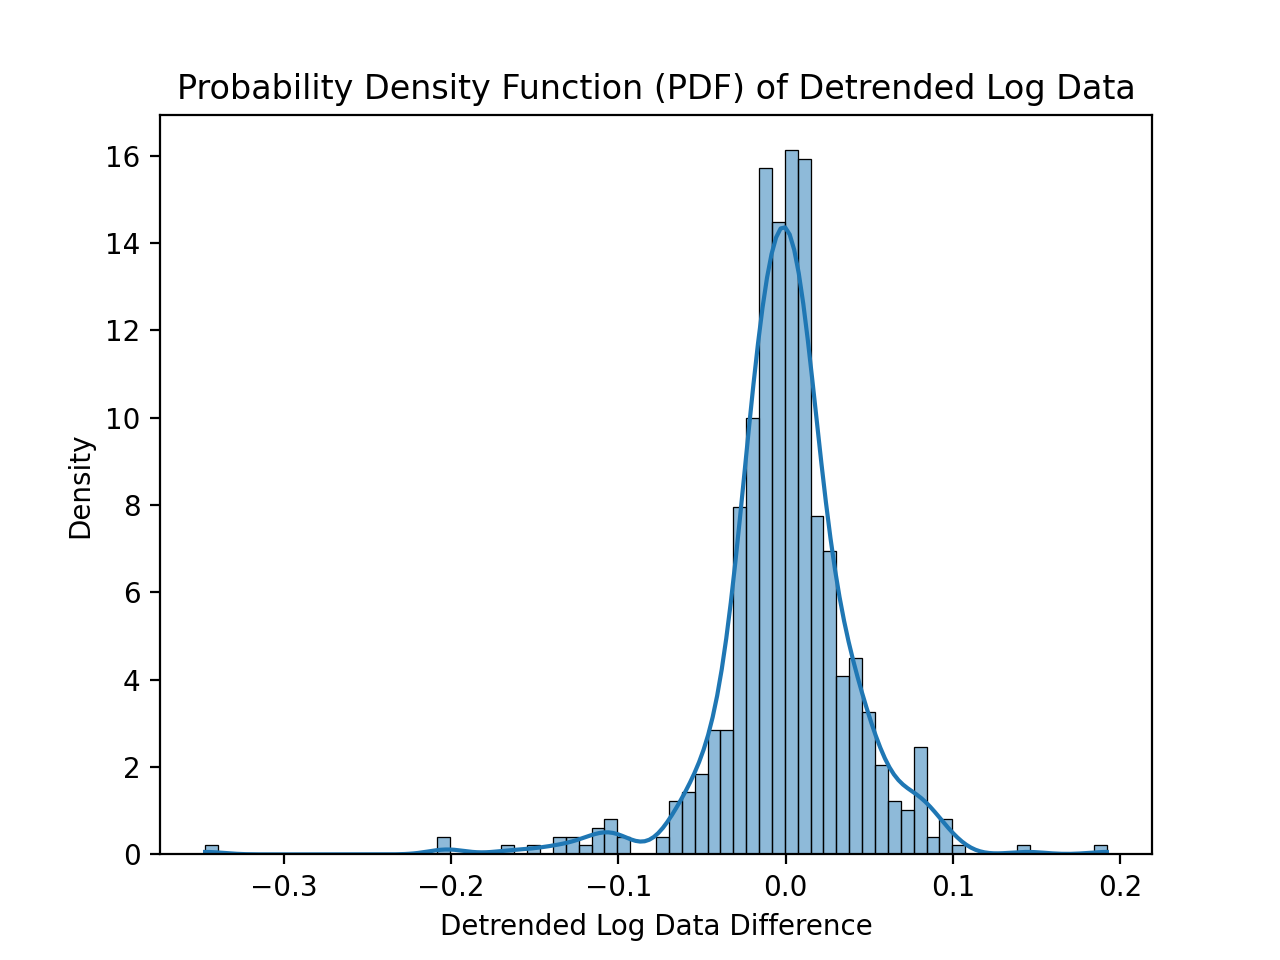

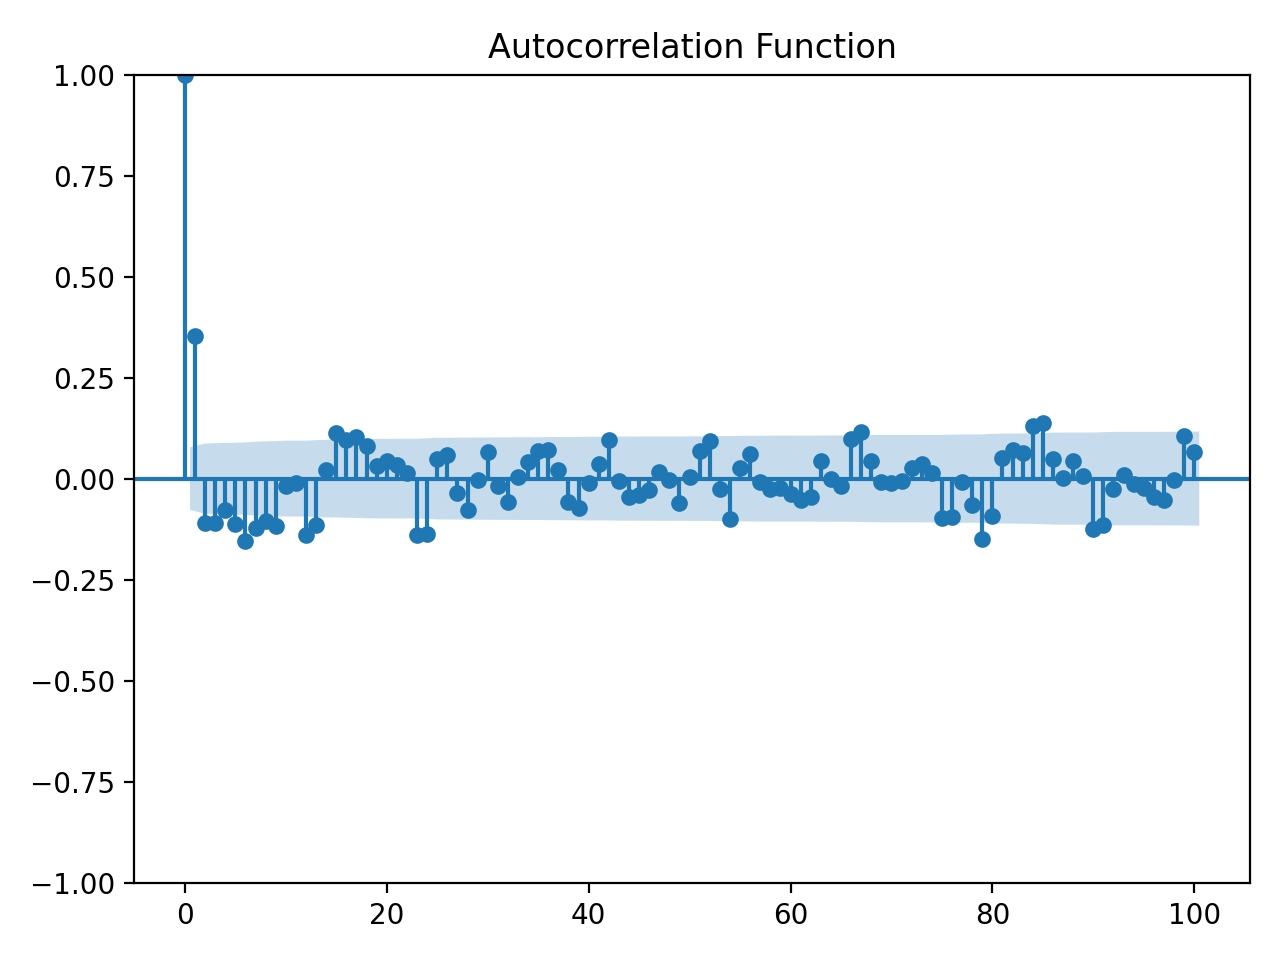

In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

# Basic statistics for detrended_data
print("Detrended Log Data:")
print("Mean:", df['detrended_log_data'].mean())
print("Standard Deviation:", df['detrended_log_data'].std())

# Plot PDF using seaborn
sns.histplot(df['detrended_log_data'], kde=True, stat='density')

# Add labels and title
plt.xlabel('Detrended Log Data Difference')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Detrended Log Data')

# Show plot
plt.show()

sm.graphics.tsa.plot_acf(df['detrended_log_data'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.tight_layout()
plt.show()


Best result given by log monthly price change, according to both stationarity tests. (monthly price change also gave stationarity result but log difference gave better result)

##Arima

In [ ]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(df['Avg. Monthly Price'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4485.676, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4383.520, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4351.280, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4485.691, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4353.017, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4352.919, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4350.490, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4352.181, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4352.070, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4382.463, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4350.662, Time=0.75 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.053 seconds
                               

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Extract univariate series for 'Avg. Monthly Price'
history = df['Avg. Monthly Price'].values.tolist()

# Split data into train and test sets
size = int(len(history) * 0.8)
train, test = history[0:size], history[size:len(history)]

# Walk-forward validation
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(train)
    predictions.append(yhat)
    # Add the observed value to the training set
    obs = test[t]
    train.append(obs)

# Print predictions or further analysis
print(predictions)


[298.6351185543783, 308.2865911985047, 305.1922990916682, 311.31090854423206, 303.08753565630735, 311.5335767991782, 294.87502889312333, 312.0984843521388, 319.0037291621766, 319.30110233579086, 319.473959614627, 295.295883251499, 289.47144911969116, 286.45660493856934, 323.04604403582306, 328.74861431761, 334.79563073013355, 304.9856685738894, 307.03923873476225, 306.57411663830067, 341.07551805031505, 295.3409636762847, 295.14143579070134, 292.1356039786986, 301.0821521090596, 297.59821859790594, 306.2924104597639, 292.99429829460144, 296.94121241518457, 297.3022150974646, 306.26440076780466, 309.4530848810042, 302.8103882229814, 298.8218506259029, 308.60141456020233, 297.69899237902183, 304.545958267208, 297.4544617970031, 293.5033136326247, 283.81212623460345, 275.83535436076306, 255.60853475967477, 230.0075068935003, 184.22308146784792, 217.9042435632315, 213.14943039918117, 210.8129357344146, 232.40229313761913, 230.1184382980748, 232.58988728682272, 222.35179025844573, 191.83082

Text(0, 0.5, 'Gasoline Price')

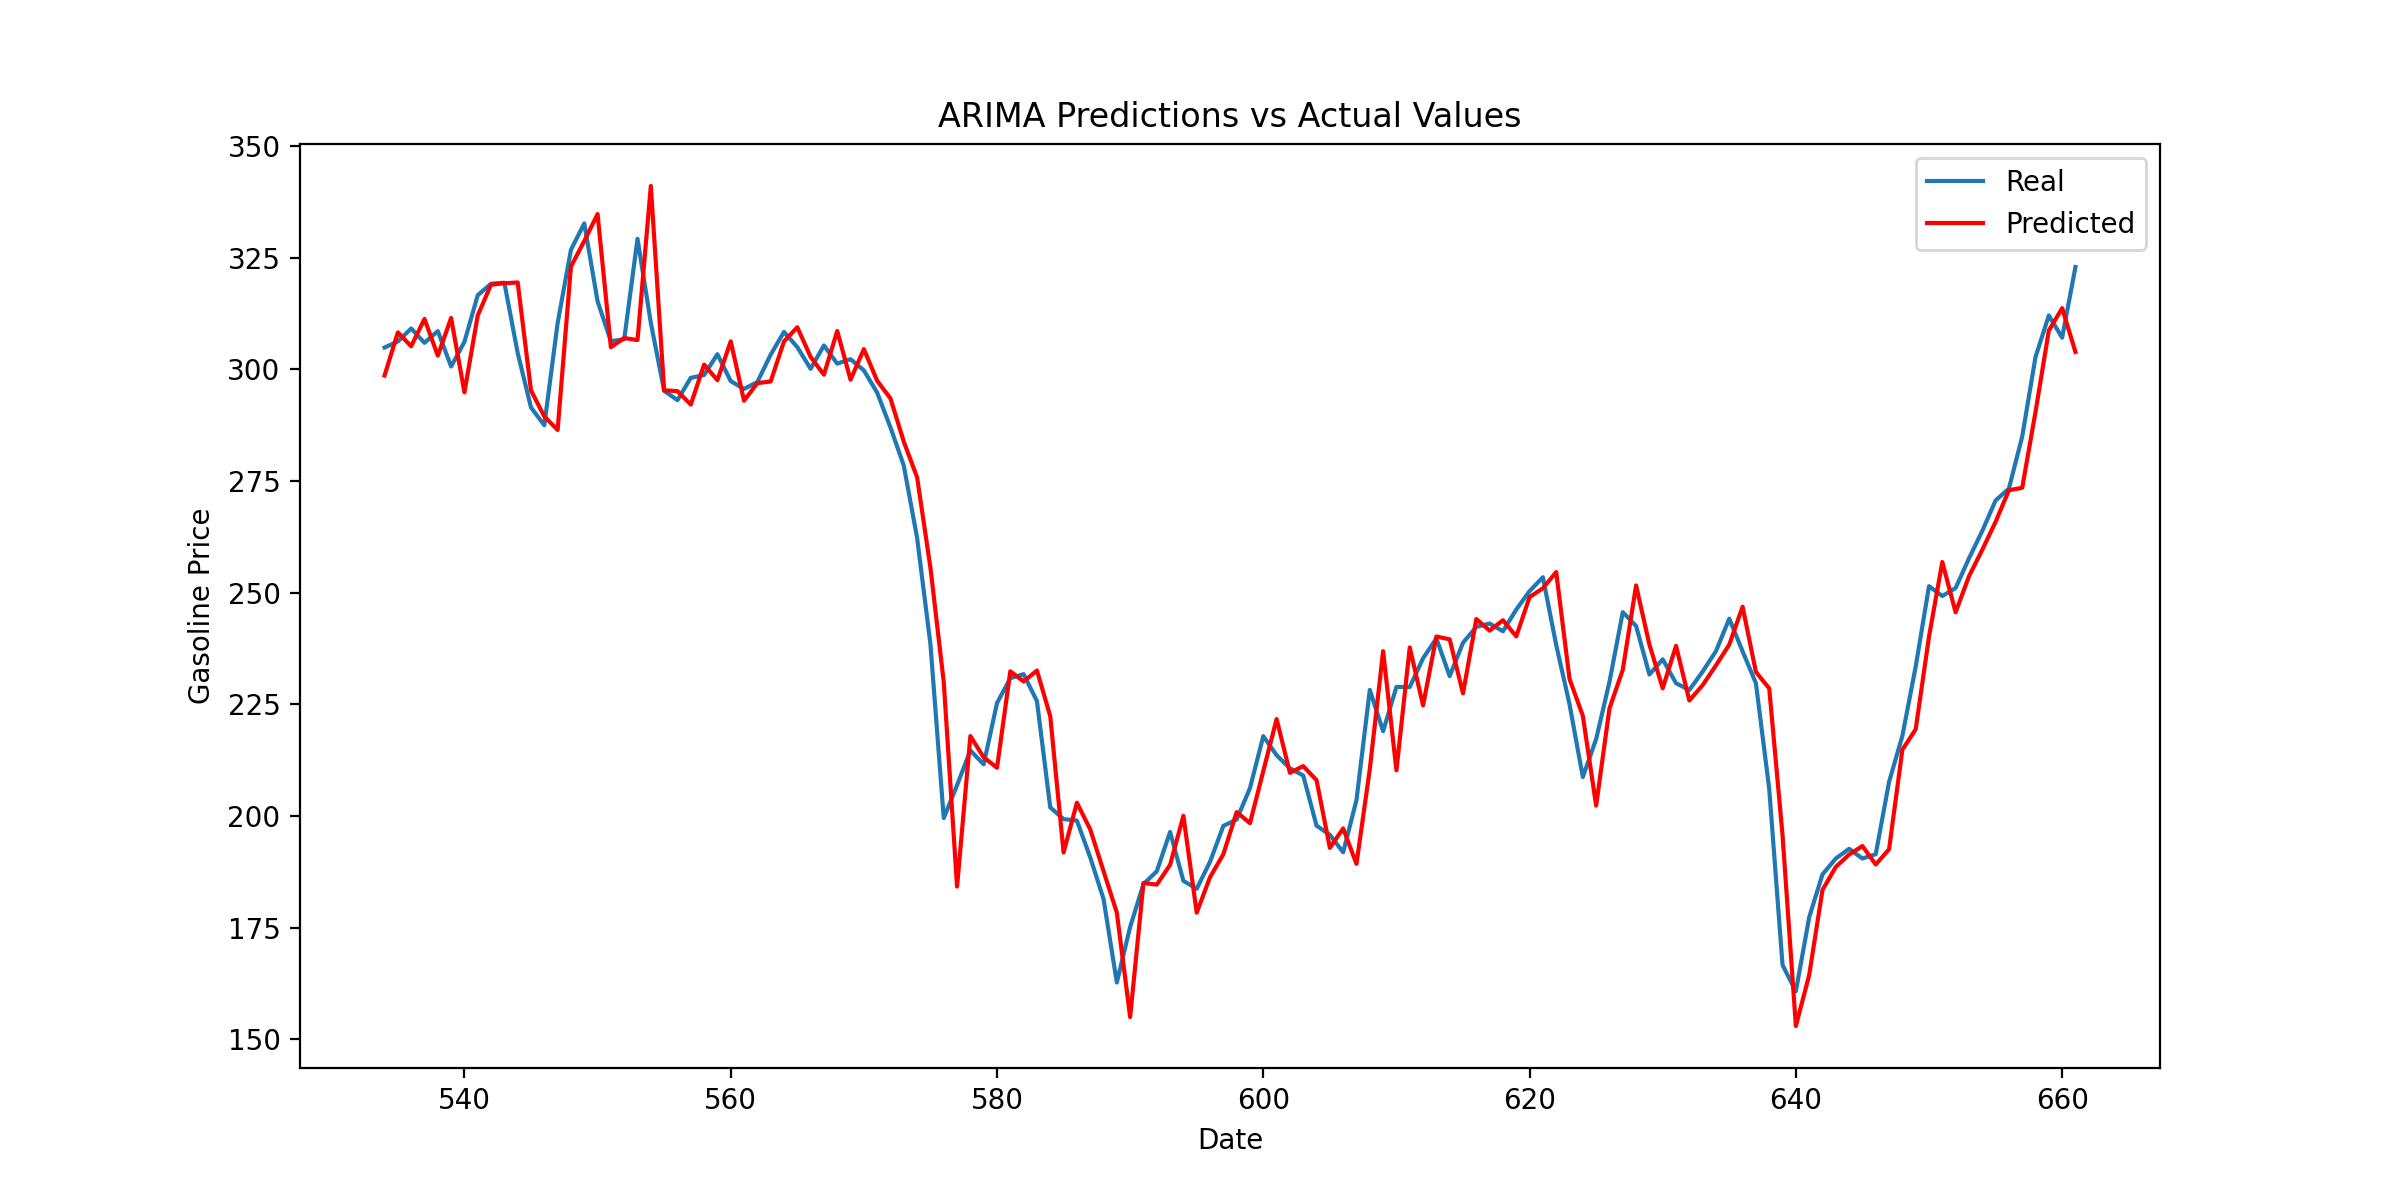

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
# plt.plot(gs['Close'], color='blue', label='Actual Stock Price')
plt.plot(df.iloc[size:,:].index, test, label='Real')
plt.plot(df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Gasoline Price')